<a href="https://colab.research.google.com/github/MakhovaAnastasia/units_lookback/blob/main/Units_lookback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics  import mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date,timedelta
import sklearn.metrics
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score,mean_absolute_percentage_error
from keras.utils import get_custom_objects
import time
from google.colab import drive
import keras.backend as K
import os

In [ ]:
#функция для получения данных о цене биткоина
def get_historical_close_data(name,step):
  if step=='1d':
    start = '2018-01-01'
    end = '2024-02-15'
    data = yf.Ticker(name)
    data=data.history(start=start, end=end,interval ='1d')
    data.reset_index(inplace=True)
    data = data.loc[:,('Date','Close')]
    data = data.sort_index(ascending = False)
    return data
  if step=='1h':
    start = '2023-01-01'
    end = '2024-02-15'
    data = yf.Ticker(name)
    data=data.history(start=start, end=end,interval ='1h')
    data.reset_index(inplace=True)
    data = data.loc[:,('Datetime','Close')]
    data = data.sort_index(ascending = False)
    return data
  if step=='1m':
    start = date.today()-timedelta(days=7)
    end = date.today()
    data = yf.Ticker(name)
    data=data.history(start=start, end=end,interval ='1m')
    data.reset_index(inplace=True)
    return data

#функция для нормализации данных
def normalization(data):
    scaler = MinMaxScaler(feature_range = (0,1))
    data_norm = scaler.fit_transform(data)

    return data_norm
#функция для денормализации данных
def de_normalization(data, new_data):
    scaler = MinMaxScaler(feature_range = (0,1))
    scaler.fit_transform(data)
    unormalized = scaler.inverse_transform(new_data)

    return unormalized

#функция, которая разделяет данные на тренировочную и тестовую части

def split_train_test(data):

    # split into train and test sets
    train_size = int(len(data) * 0.75)
    train, test = data[0:train_size,], data[train_size:len(data),]
    return train, test

# не получится достать разделить данные на тестовую и тренировочную часть стандартными  библиотеками, поэтому делаем функцию, в которой наблюдения такие
# X= цена сегодня, y= цена следующего дня

def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookback-1):
      a = dataset[i:(i+lookback), 0]   ###i=0, 0,1,2,3-----99   100
      dataX.append(a)
      dataY.append(dataset[i + lookback, 0])
    return np.array(dataX), np.array(dataY)


def cloglog(x):
  return (1-K.exp(-K.exp(x)))

def loglog(x):
    return (K.exp(-K.exp(-x)))



Для выполнения следующего кода вам нужно выдать доступ до вашего гугл диска. Все результаты рассчётов будут в папке "diploma" на вашем гугл-диске

In [ ]:
import shutil

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
activation_functions=['tanh','sigmoid','relu','linear','cloglog','loglog']
steps= ['1d','1h','1m']
units = [1,2,4,16,32,64,128]

df=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
result_loss=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
result_val_loss=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
train_timing=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
test_timing=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})

companies = 'BTC-USD'
lookback=13


In [ ]:


for step in steps:
  url='/content/drive/MyDrive/diploma/'+companies+'/'+step+'/'
  # Получаем список файлов в указанной папке

  files = os.listdir(url)
  for file in files:
    path = os.path.join(url, file)
    if os.path.isfile(path) or os.path.islink(path):
      # remove file
      os.remove(path)
    elif os.path.isdir(path):
      # remove directory and all its content
      shutil.rmtree(path)

  try:
      os.makedirs(url)
      print("Папка создана:", url)
  except FileExistsError:
      print("Папка уже существует:", url)


  for activ in activation_functions:
    url='/content/drive/MyDrive/diploma/'+companies+'/'+step+'/'+activ+'/'

    try:
      os.makedirs(url)
      print("Папка создана:", url)
    except FileExistsError:
      print("Папка уже существует:", url)

--------------------------------------------

units

In [ ]:
steps = ['1m']
activation_functions=['tanh','sigmoid','relu','linear','cloglog','loglog']
units = [1,2,4,16,32,64,128]

In [ ]:
i = 0

tanh units = 1
68/68 [==============================] - 0s 2ms/step


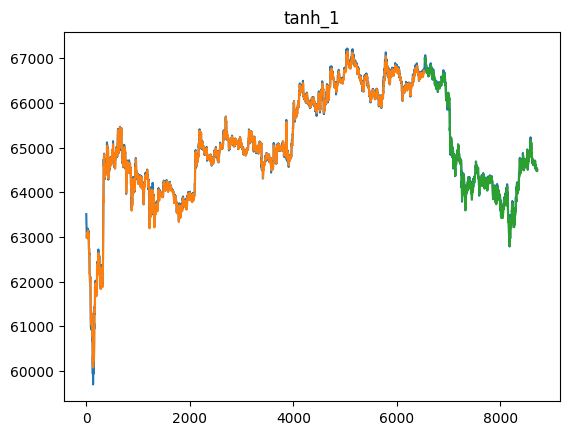

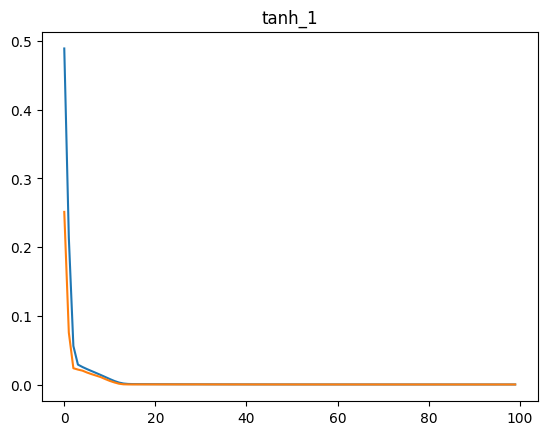

sigmoid units = 1
68/68 [==============================] - 0s 2ms/step


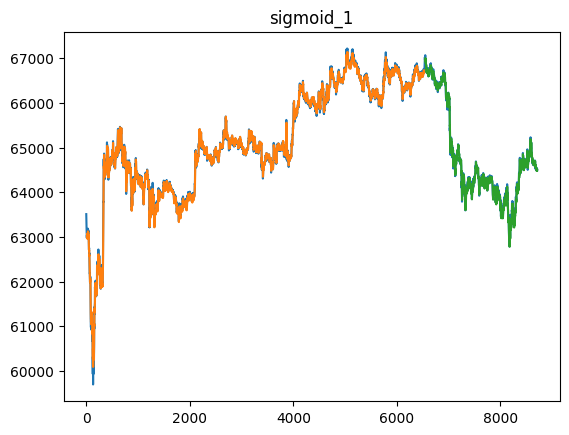

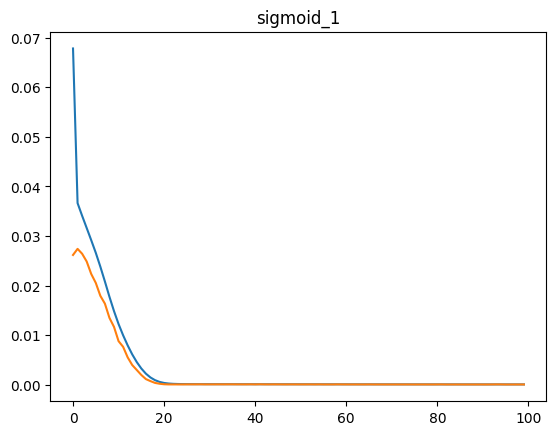

relu units = 1
68/68 [==============================] - 0s 4ms/step


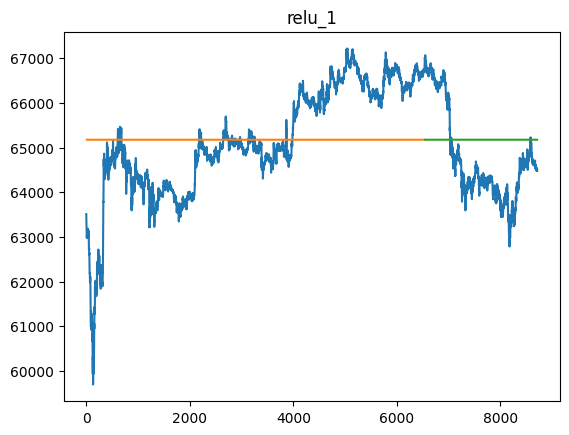

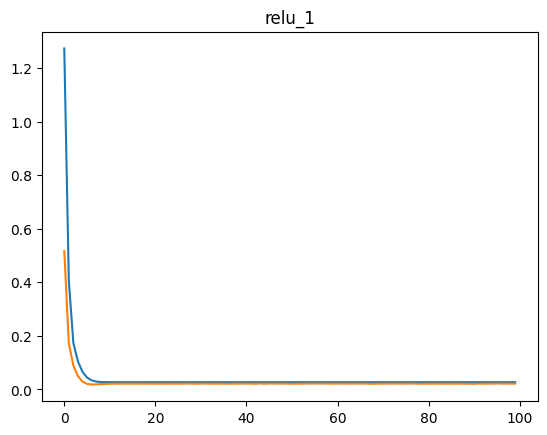

linear units = 1
68/68 [==============================] - 0s 3ms/step


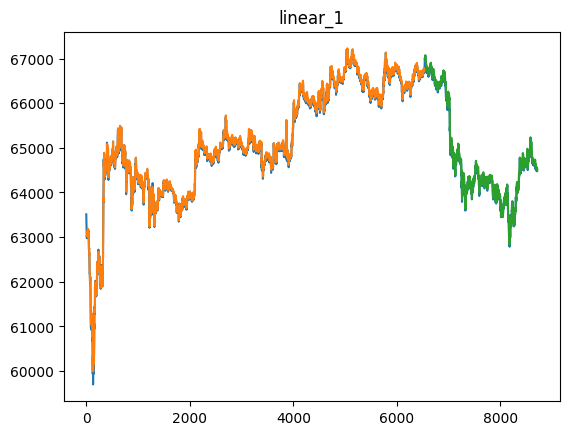

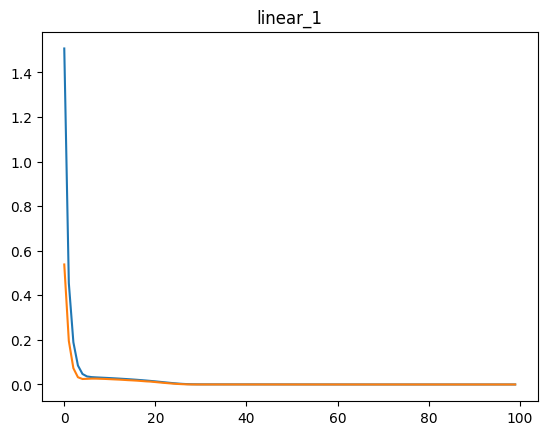

cloglog units = 1
68/68 [==============================] - 0s 2ms/step


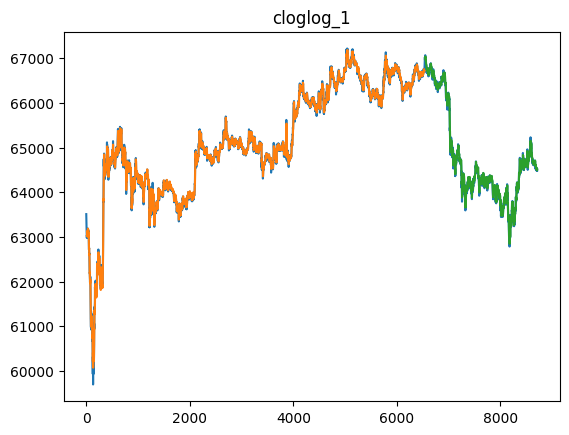

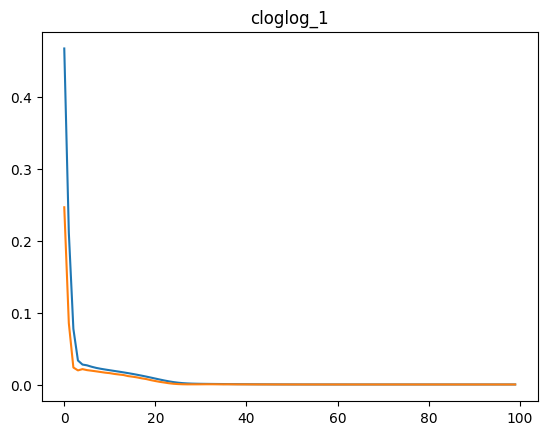

loglog units = 1
68/68 [==============================] - 0s 2ms/step


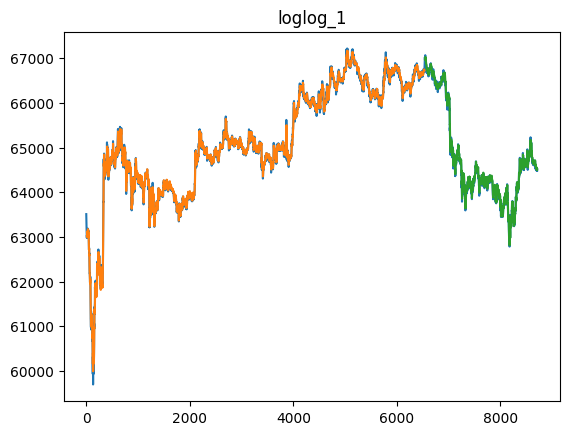

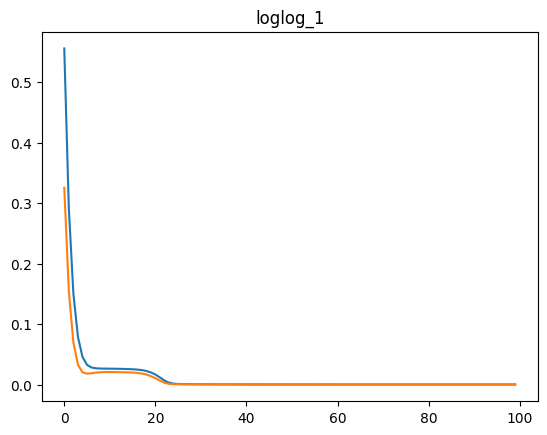

tanh units = 2
68/68 [==============================] - 0s 4ms/step


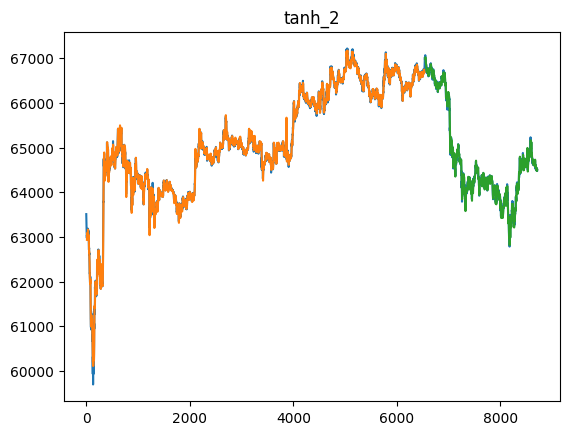

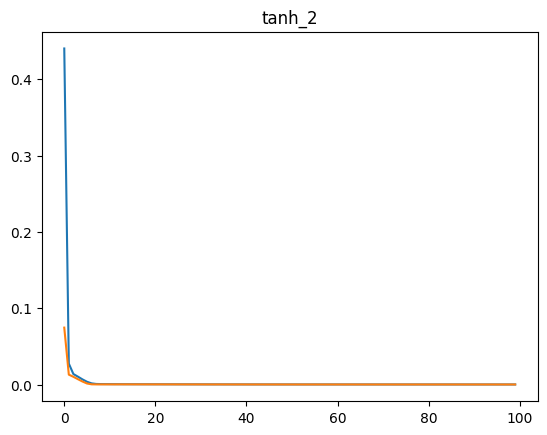

sigmoid units = 2
68/68 [==============================] - 0s 3ms/step


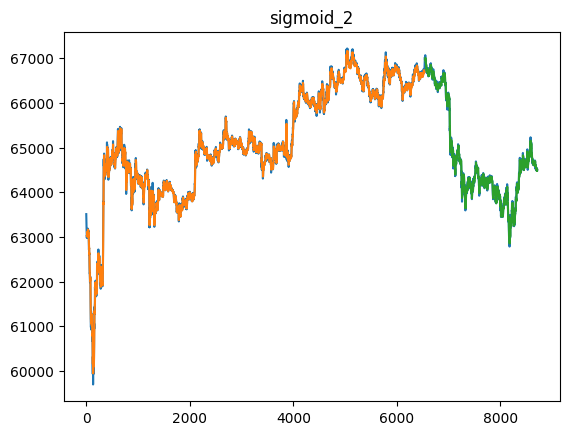

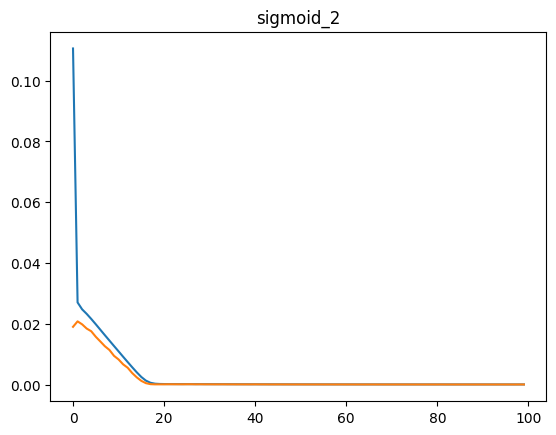

relu units = 2
68/68 [==============================] - 0s 3ms/step


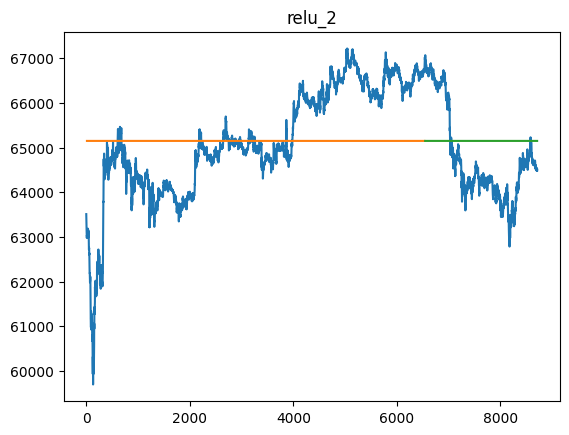

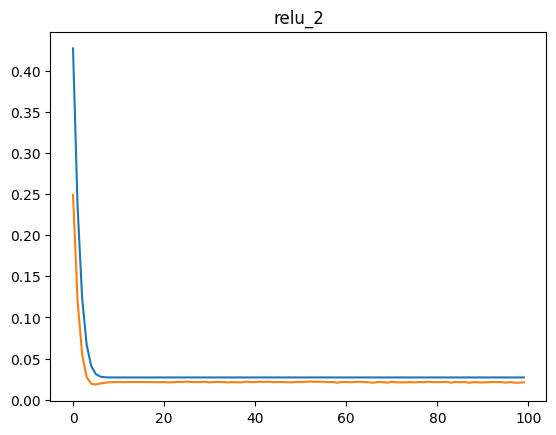

linear units = 2
68/68 [==============================] - 0s 3ms/step


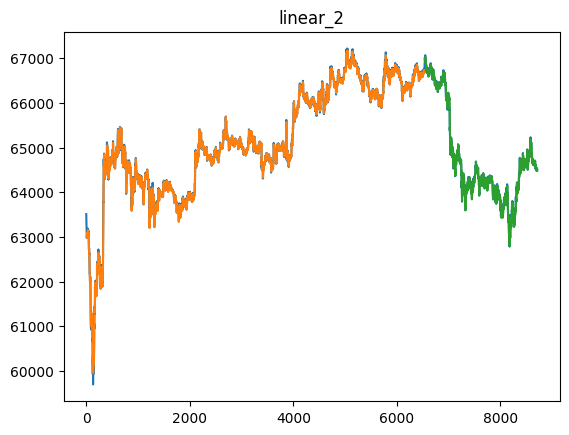

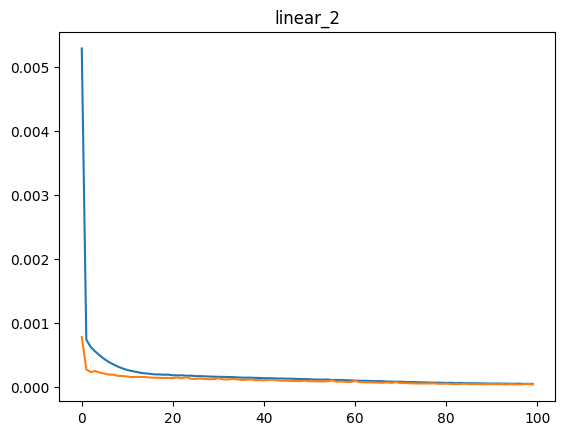

cloglog units = 2
68/68 [==============================] - 0s 3ms/step


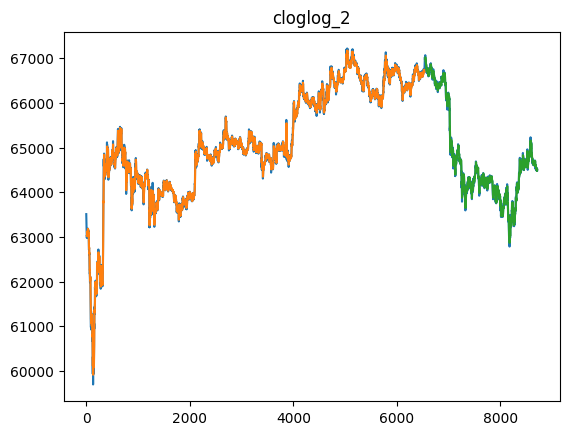

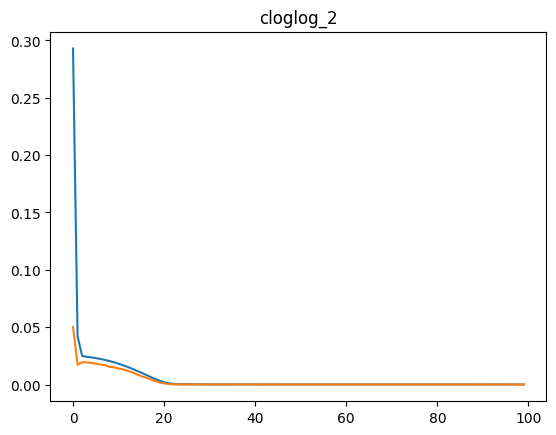

loglog units = 2
68/68 [==============================] - 0s 3ms/step


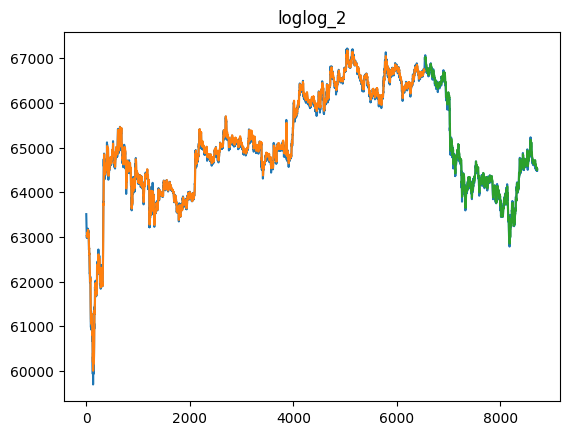

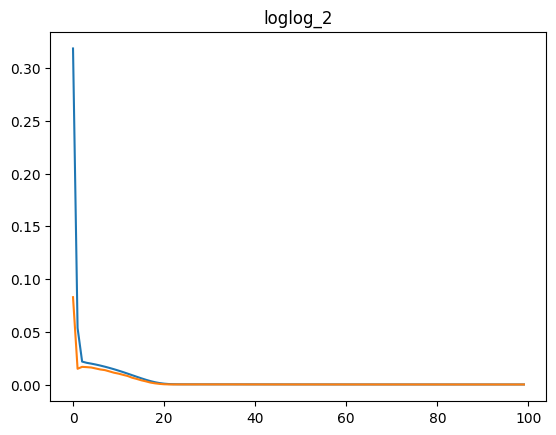

tanh units = 4
68/68 [==============================] - 0s 3ms/step


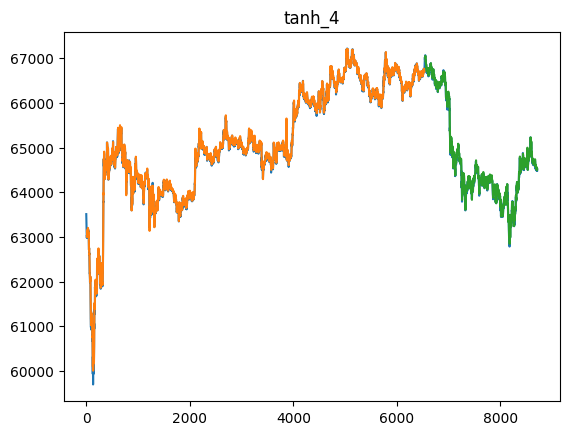

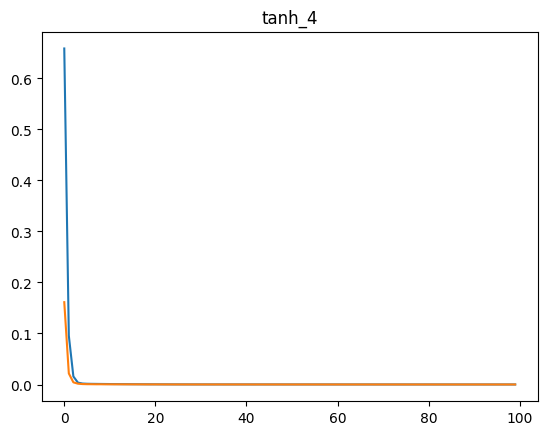

sigmoid units = 4
68/68 [==============================] - 0s 3ms/step


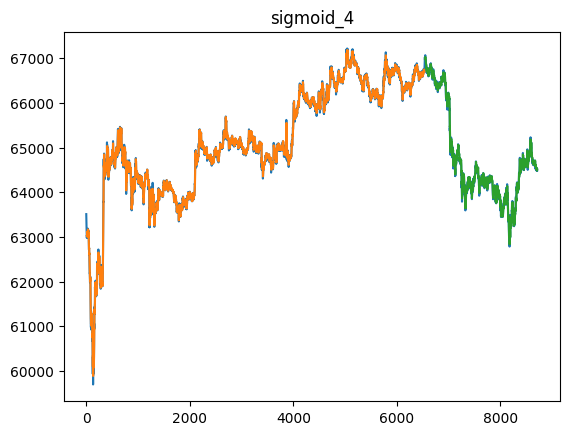

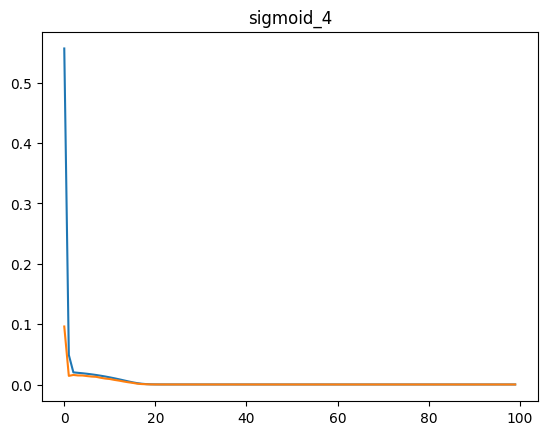

relu units = 4
68/68 [==============================] - 0s 3ms/step


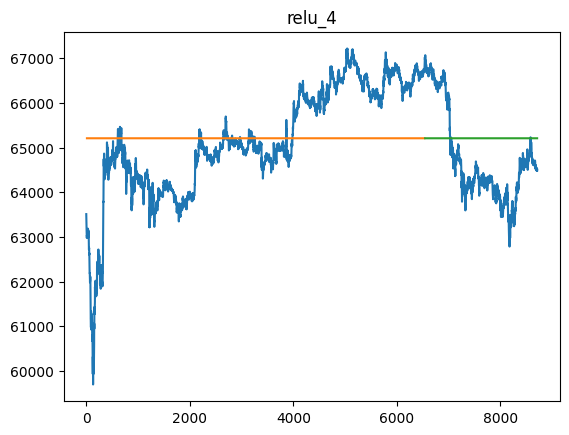

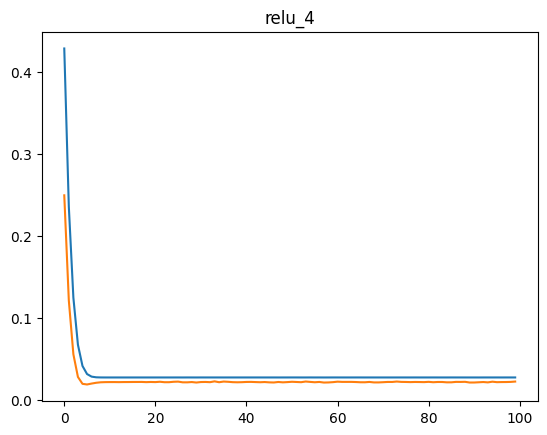

linear units = 4
68/68 [==============================] - 0s 4ms/step


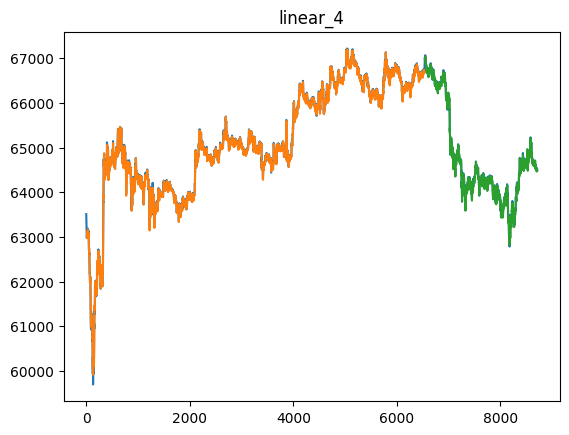

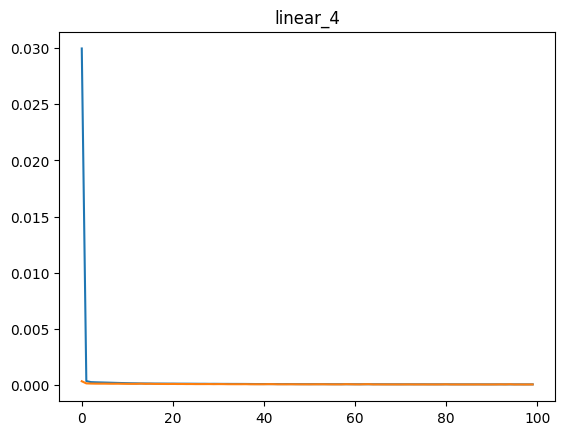

cloglog units = 4
68/68 [==============================] - 0s 3ms/step


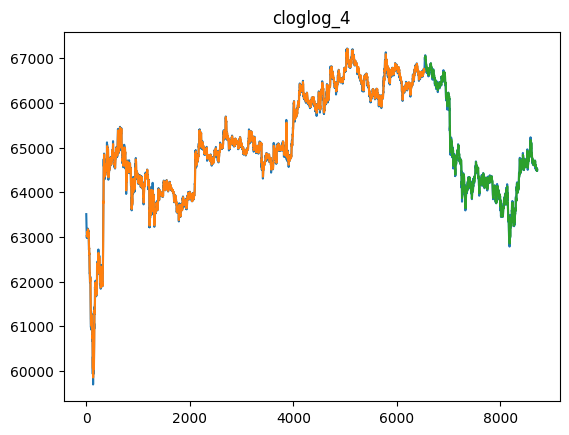

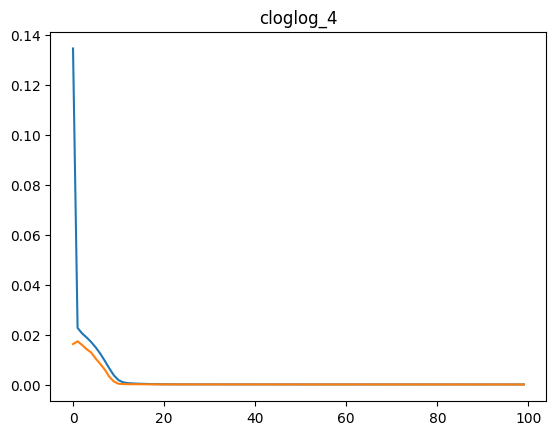

loglog units = 4
68/68 [==============================] - 0s 3ms/step


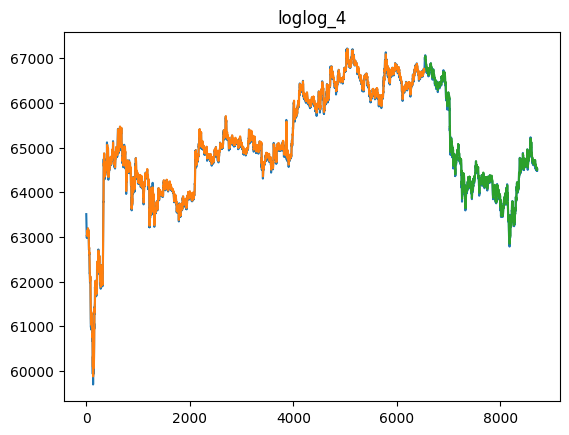

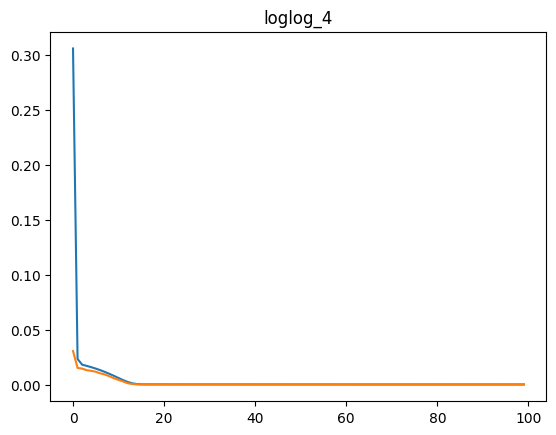

tanh units = 16
68/68 [==============================] - 0s 3ms/step


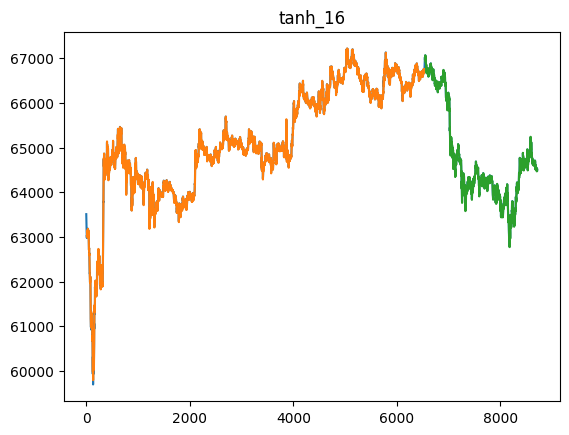

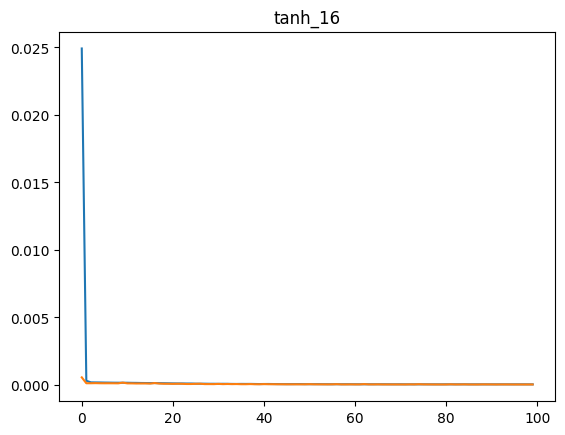

sigmoid units = 16
68/68 [==============================] - 0s 3ms/step


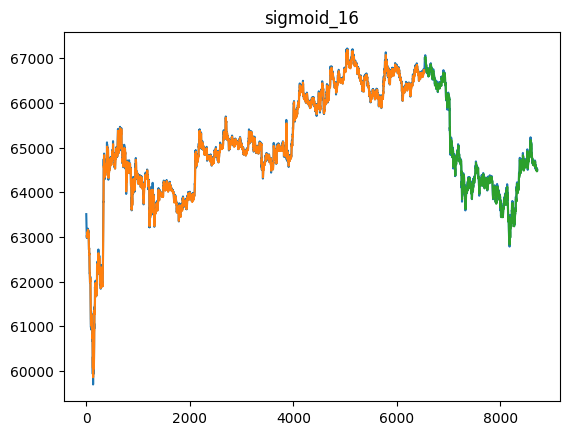

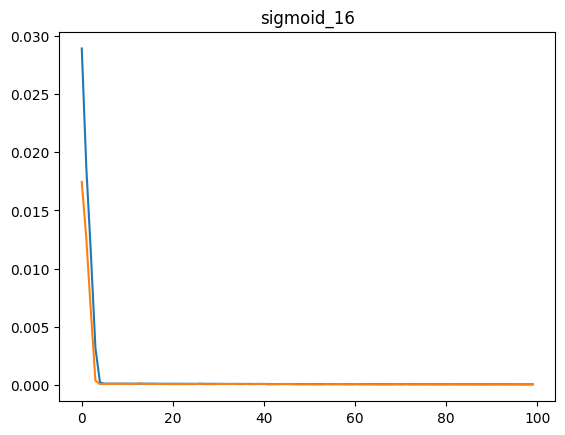

relu units = 16
68/68 [==============================] - 0s 3ms/step


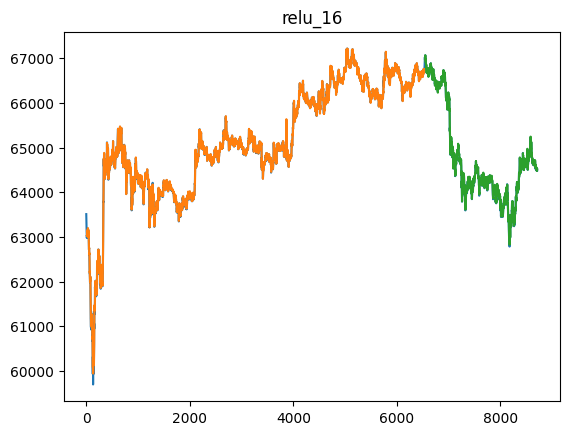

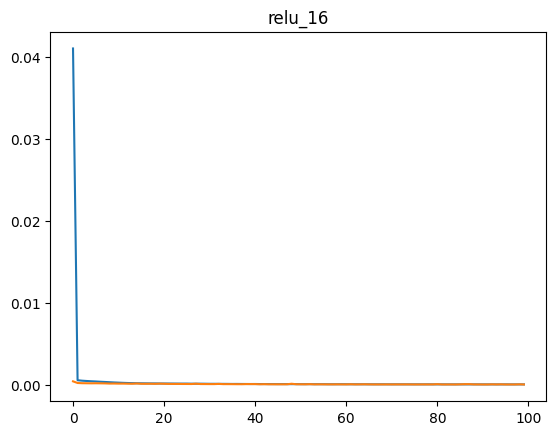

linear units = 16
68/68 [==============================] - 0s 3ms/step


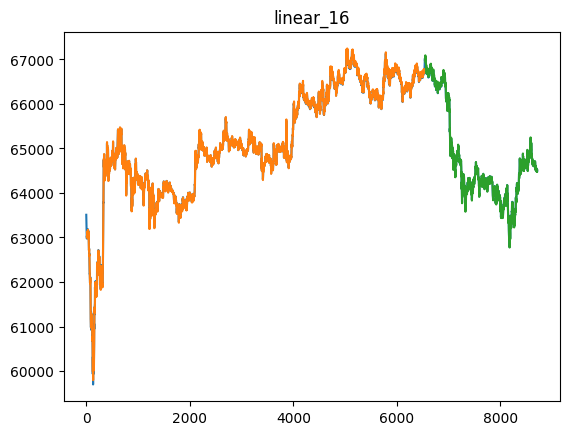

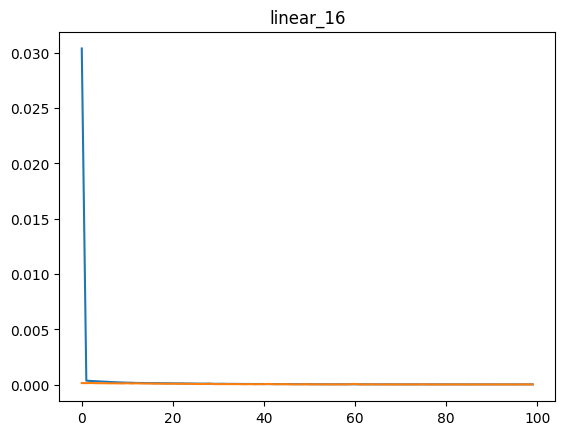

cloglog units = 16
68/68 [==============================] - 0s 3ms/step


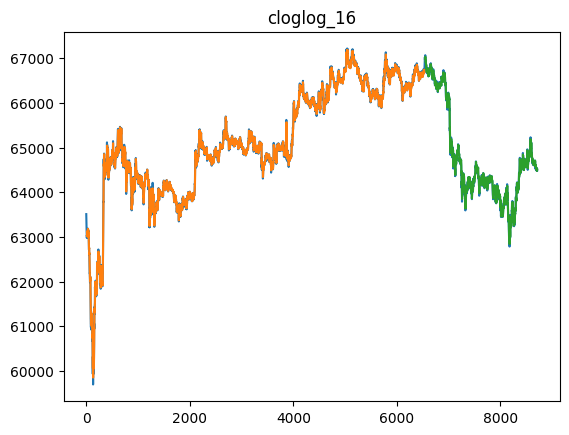

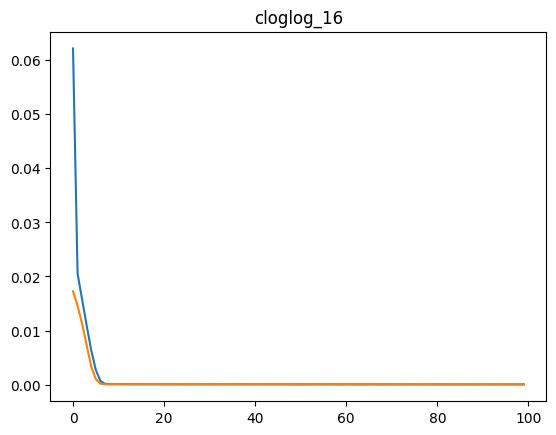

loglog units = 16
68/68 [==============================] - 0s 3ms/step


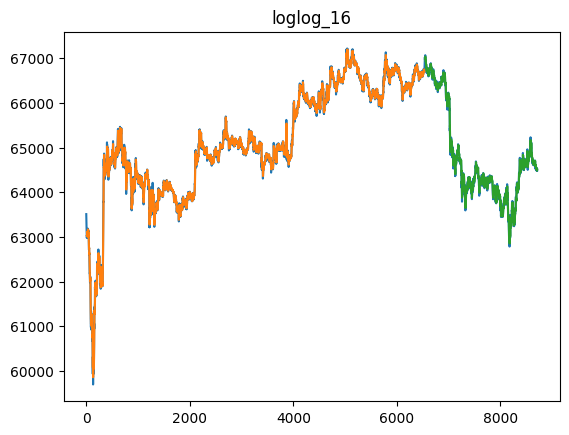

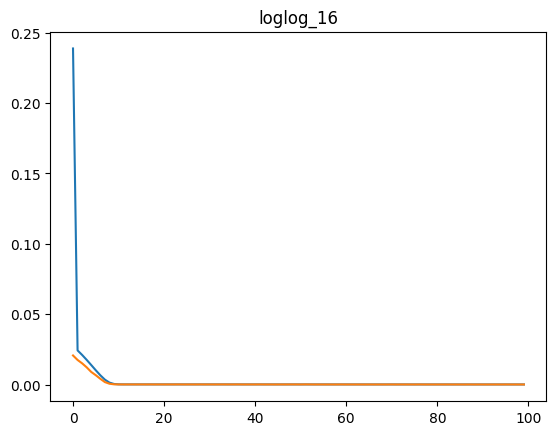

tanh units = 32
68/68 [==============================] - 0s 4ms/step


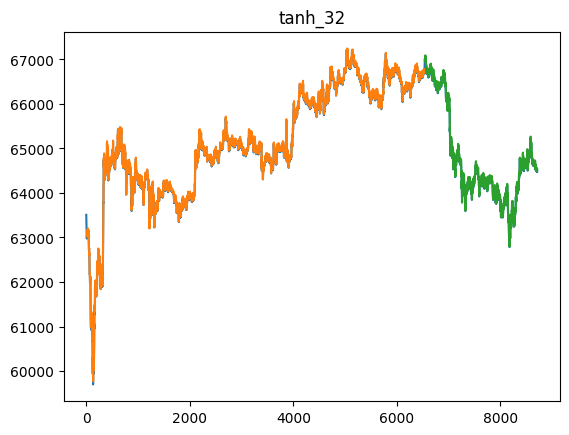

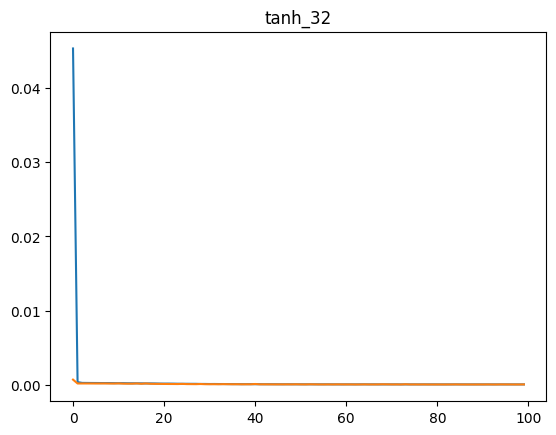

sigmoid units = 32
68/68 [==============================] - 0s 3ms/step


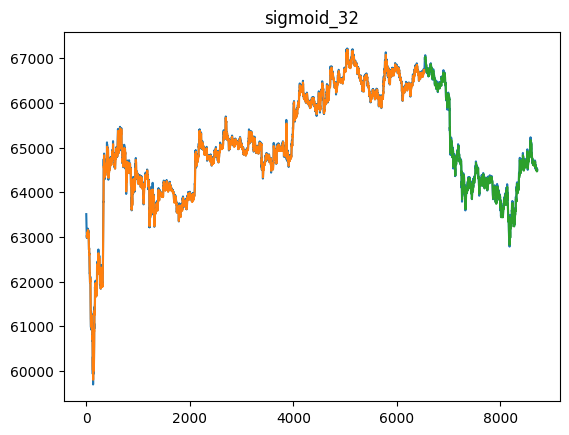

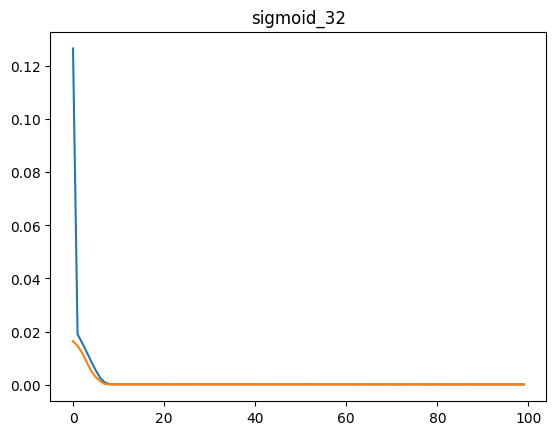

relu units = 32
68/68 [==============================] - 0s 3ms/step


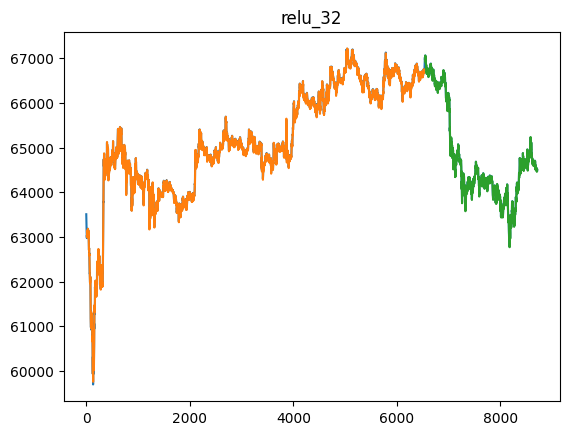

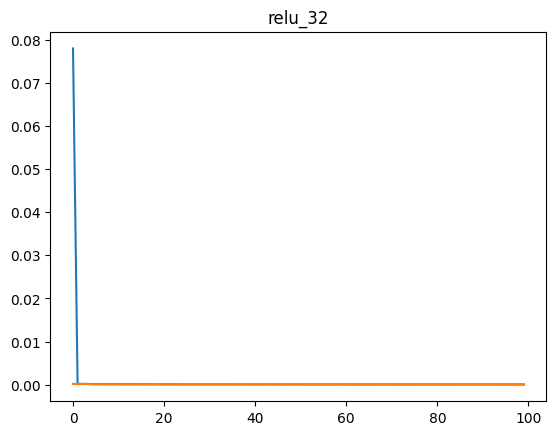

linear units = 32
68/68 [==============================] - 0s 3ms/step


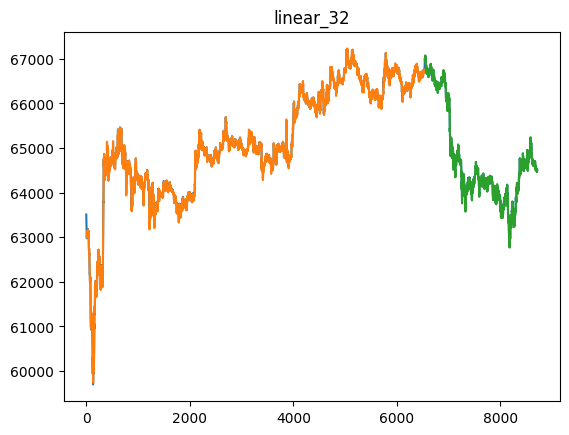

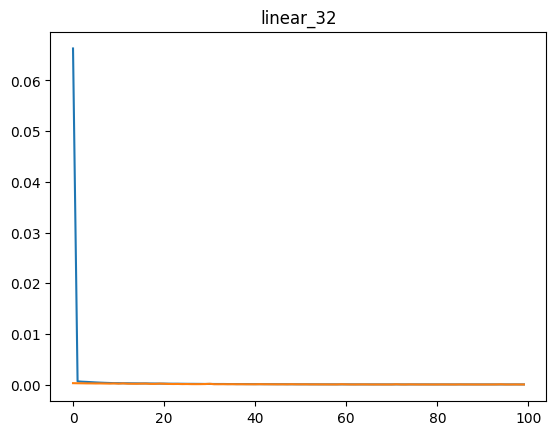

cloglog units = 32
68/68 [==============================] - 0s 4ms/step


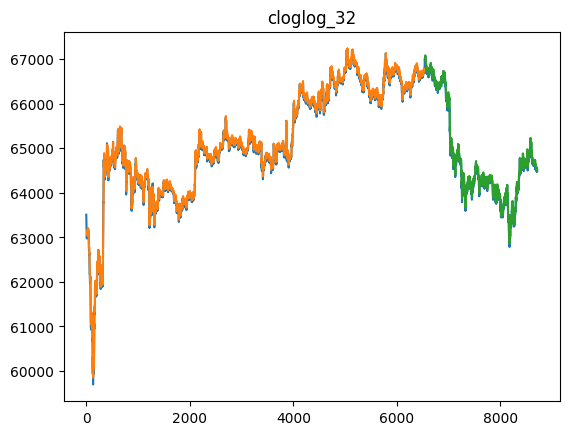

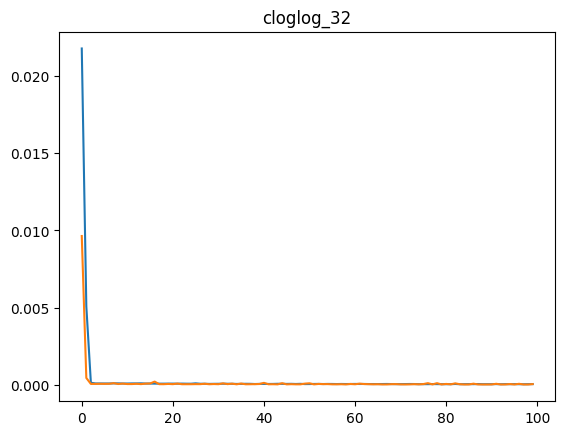

loglog units = 32
68/68 [==============================] - 0s 3ms/step


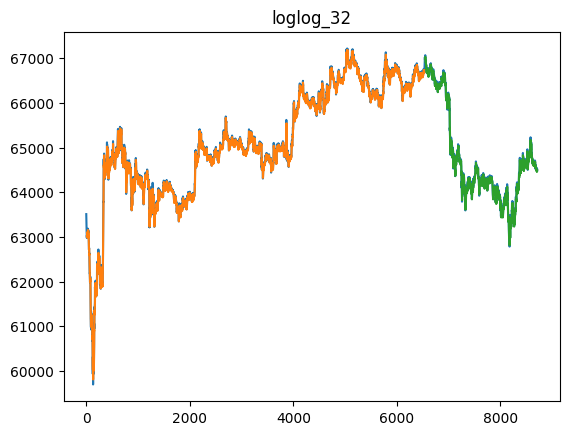

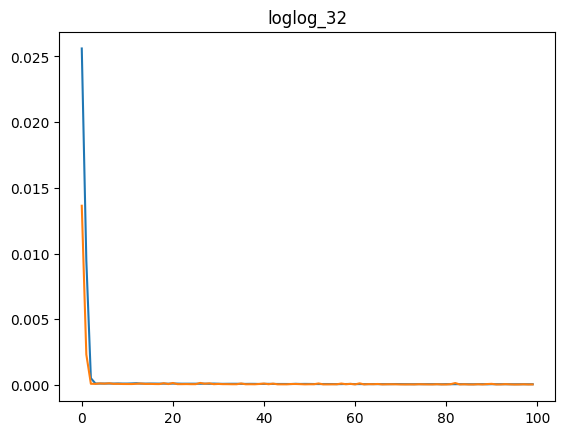

tanh units = 64
68/68 [==============================] - 0s 4ms/step


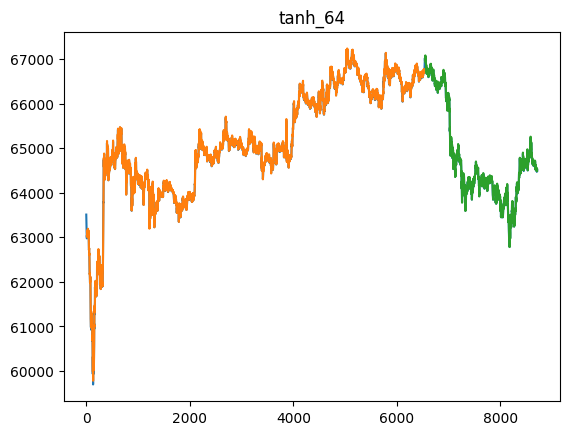

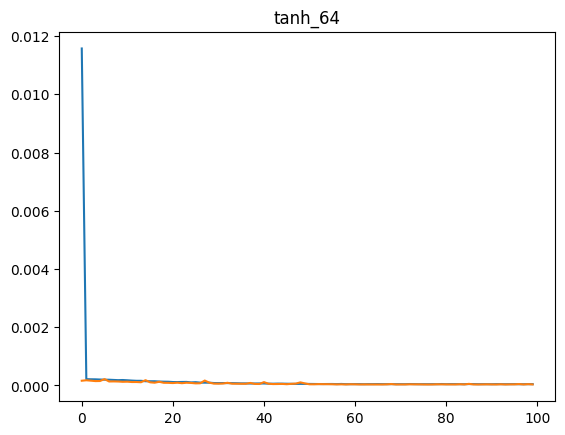

sigmoid units = 64
68/68 [==============================] - 0s 4ms/step


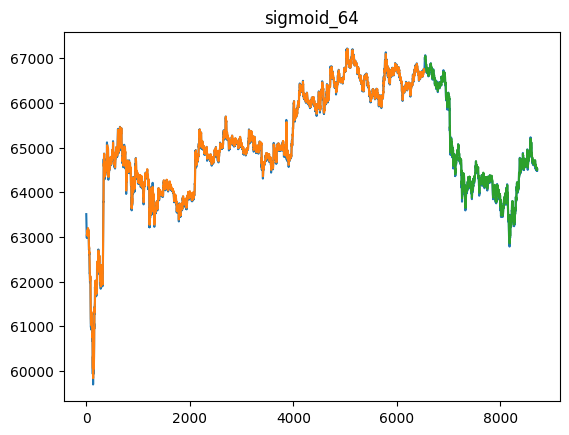

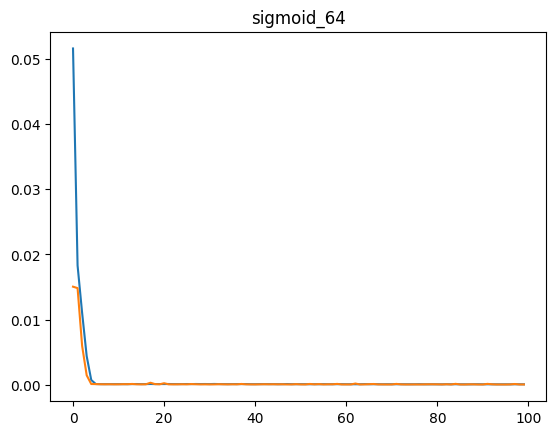

relu units = 64
68/68 [==============================] - 0s 4ms/step


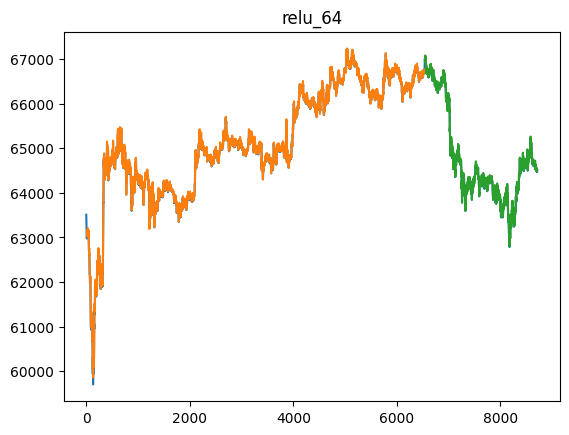

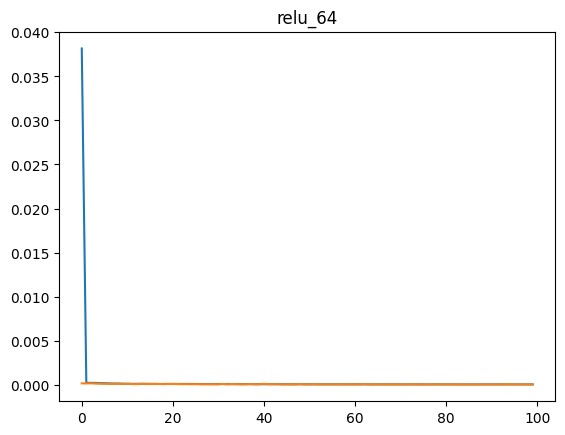

linear units = 64
68/68 [==============================] - 0s 4ms/step


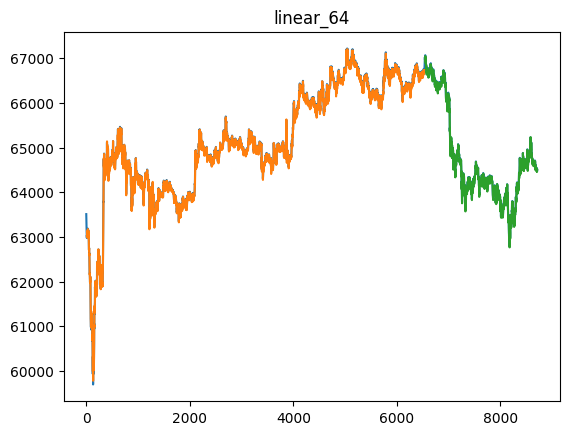

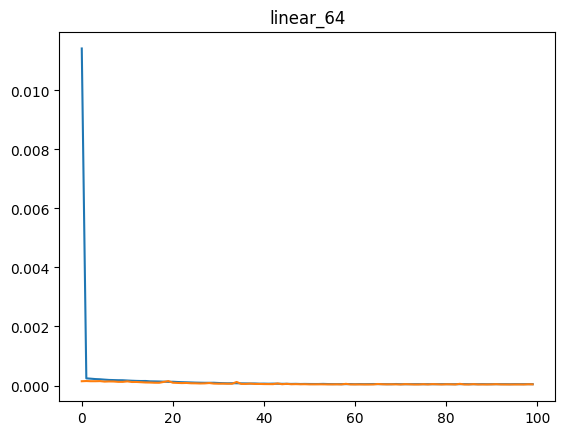

cloglog units = 64
68/68 [==============================] - 1s 13ms/step


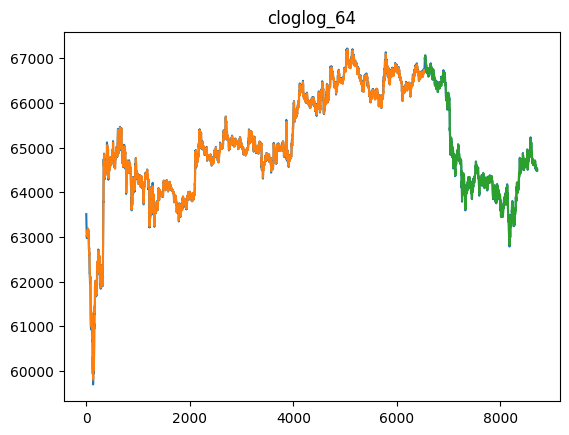

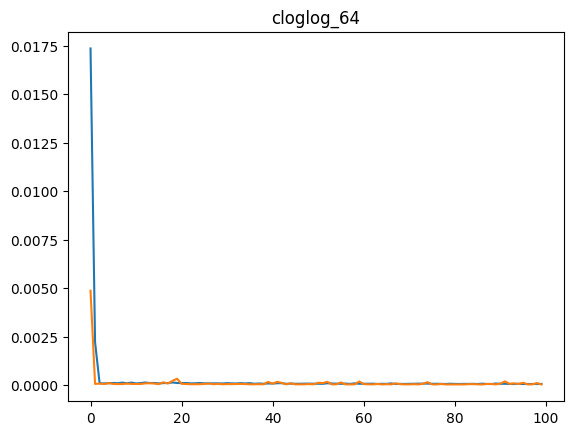

loglog units = 64
68/68 [==============================] - 1s 9ms/step


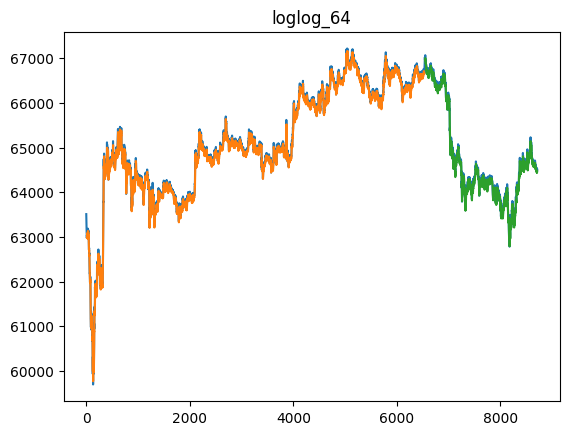

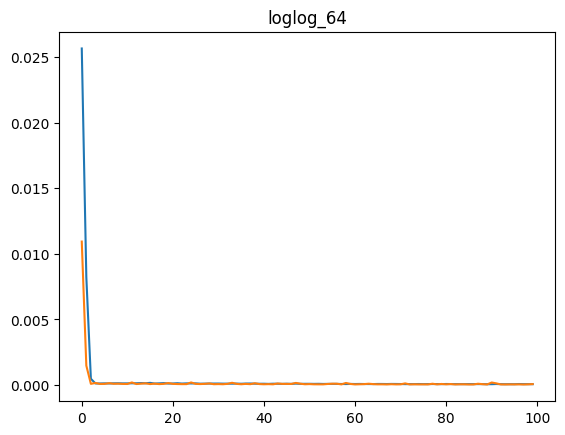

tanh units = 128
68/68 [==============================] - 1s 11ms/step


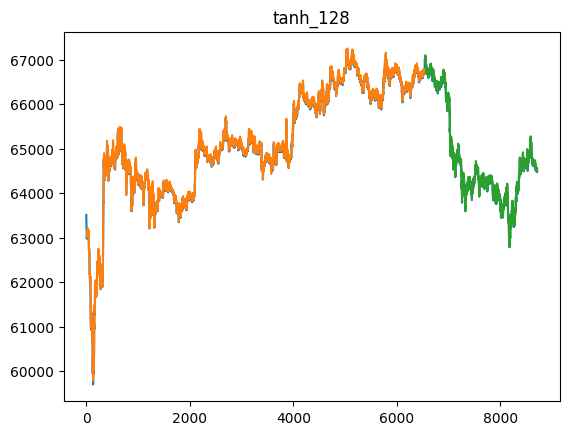

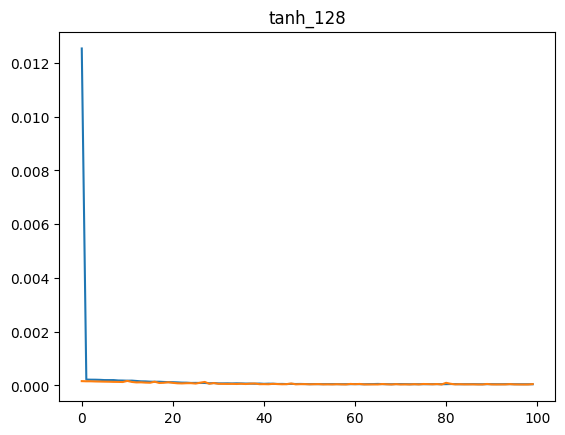

sigmoid units = 128
68/68 [==============================] - 1s 11ms/step


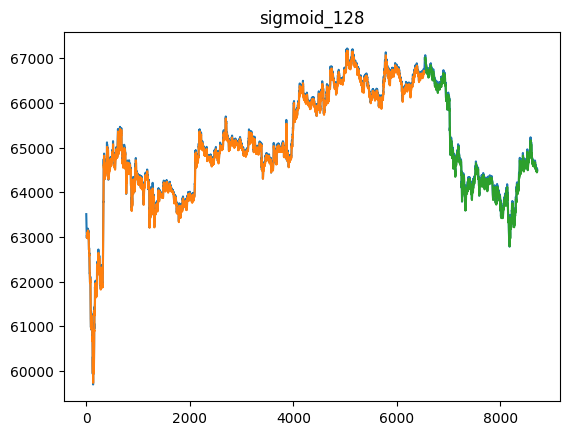

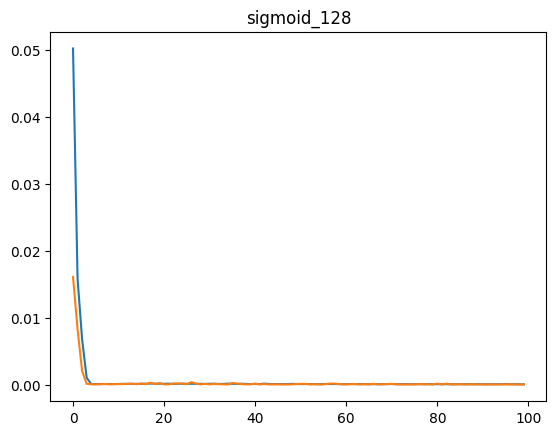

relu units = 128
68/68 [==============================] - 1s 12ms/step


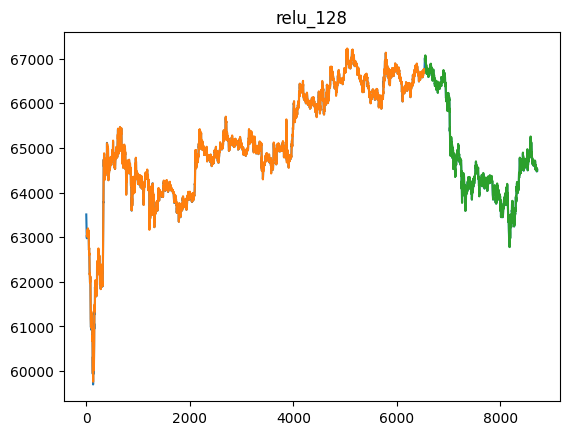

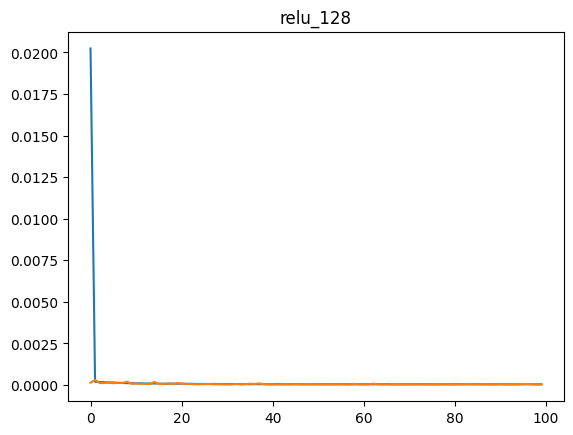

linear units = 128
68/68 [==============================] - 1s 12ms/step


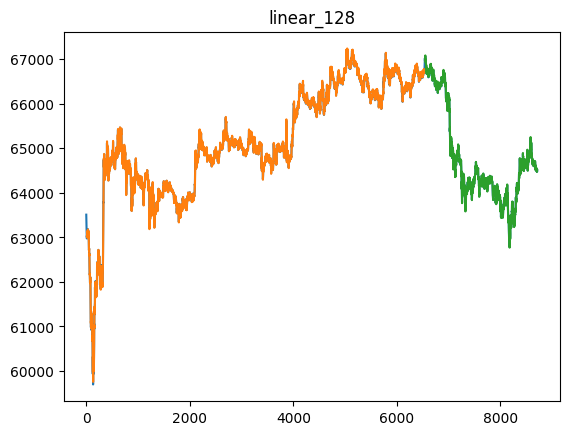

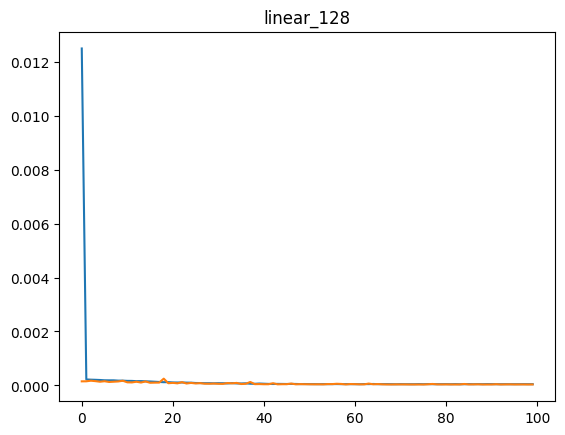

cloglog units = 128
68/68 [==============================] - 1s 15ms/step


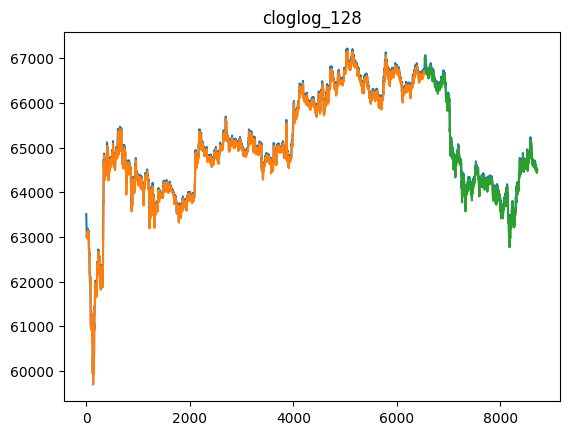

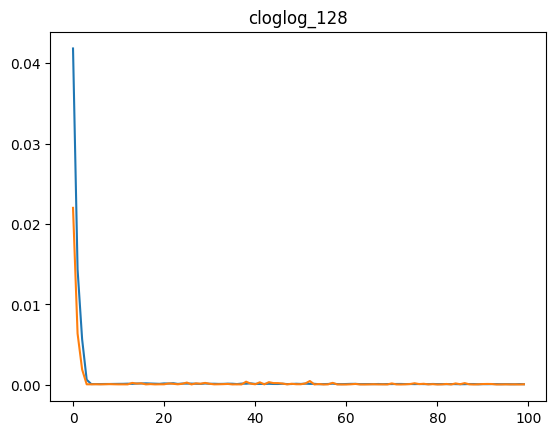

loglog units = 128
68/68 [==============================] - 1s 15ms/step


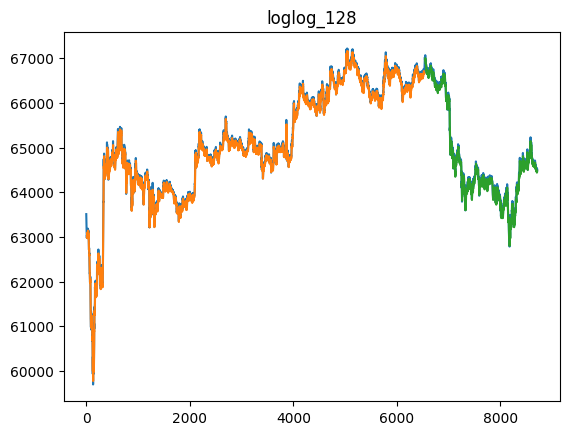

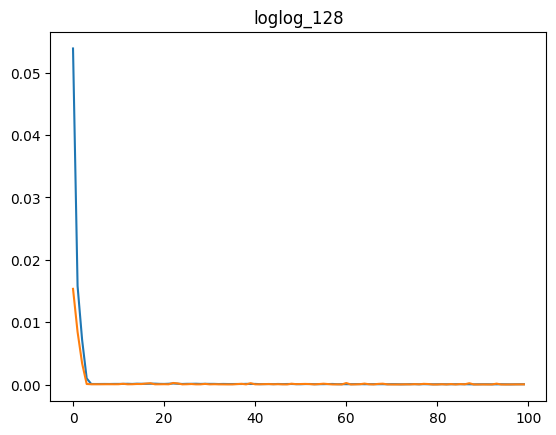

In [ ]:
for step in steps:

  for unit in units:

    for activ in activation_functions:
      url='/content/drive/MyDrive/diploma/'+companies+'/'+step+'/'+activ+'/'
      tf.keras.backend.clear_session()
      print(activ+' units = '+str(unit))
      dataset = get_historical_close_data(companies,step)
      #dataset_norm = normalization(dataset['Close'].values.reshape(-1,1))
      scaler=MinMaxScaler(feature_range=(0,1))
      dataset_norm=scaler.fit_transform(np.array(dataset['Close'].values).reshape(-1,1))

      train_dataset, test_dataset = split_train_test(dataset_norm)

      train_X, train_y = create_dataset(train_dataset, lookback)

      test_X, test_y = create_dataset(test_dataset,lookback)

      # reshape input to be [samples, time steps, features] which is required for LSTM
      train_X =train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
      test_X = test_X.reshape(test_X.shape[0],test_X.shape[1] , 1)

      #-------------------------------
      tf.keras.backend.clear_session()

      if (activ!='cloglog' and activ!='loglog'):
        model=Sequential()
        model.add(LSTM(unit,input_shape=(lookback,1),activation=activ))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',optimizer='adam')
        start_time = time.time()
        result=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=100,batch_size=32,verbose=False)
        end_time = time.time()
        train_timing.loc[i, activ]=(end_time-start_time)

      elif (activ=='cloglog' or activ=='loglog') :
        get_custom_objects().update({'custom_activation': Activation(globals()[activ])})
        model=Sequential()
        model.add(LSTM(unit,input_shape=(lookback,1),activation='custom_activation'))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',optimizer='adam')
        start_time = time.time()
        result=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=100,batch_size=32,verbose=False)
        end_time = time.time()
        train_timing.loc[i, activ]=(end_time-start_time)
      #-------------------------------

      train_predict=model.predict(train_X)
      start_time = time.time()
      test_predict=model.predict(test_X)
      end_time = time.time()
      test_timing.loc[i, activ]=(end_time-start_time)
      train_predict.shape, test_predict.shape

      # Transform back to original form
      train_predict = scaler.inverse_transform(train_predict)
      test_predict = scaler.inverse_transform(test_predict)
      original_ytrain = scaler.inverse_transform(train_y.reshape(-1,1))
      original_ytest = scaler.inverse_transform(test_y.reshape(-1,1))


      rmse_train= math.sqrt(mean_squared_error(original_ytrain,train_predict))
      mae_train=mean_absolute_error(original_ytrain,train_predict)
      mape_train=mean_absolute_percentage_error(original_ytrain,train_predict)

      rmse_test=math.sqrt(mean_squared_error(original_ytest,test_predict))
      mae_test=mean_absolute_error(original_ytest,test_predict)
      mape_test=mean_absolute_percentage_error(original_ytest,test_predict)

      df[activ]=[rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]


      trainPredictPlot = np.empty_like(dataset_norm)
      trainPredictPlot[:, ] = np.nan

      trainPredictPlot[lookback:len(train_predict)+lookback, ] = train_predict[:,0].reshape(-1,1)

      testPredictPlot = np.empty_like(dataset_norm)
      testPredictPlot[:,] = np.nan
      testPredictPlot[len(train_predict)+(lookback*2)+1:len(dataset['Close'])-1, ] = test_predict[:,0].reshape(-1,1)

      plt.plot(de_normalization(dataset['Close'].values.reshape(-1,1),dataset_norm))
      plt.plot(trainPredictPlot)
      plt.plot(testPredictPlot)
      plt.title(activ+'_'+str(unit))
      plt.savefig(url+str(activ)+'_'+companies+'_'+step+'_'+str(unit)+'.png')
      plt.show()

      plt.plot(result.history['loss'])
      plt.plot(result.history['val_loss'])
      plt.title(activ+'_'+str(unit))
      plt.savefig(url+str(activ)+'_loss_'+companies+'_'+step+'_'+str(unit)+'.png')
      plt.show()


      result_loss[activ]=result.history['loss']
      result_val_loss[activ]=result.history['val_loss']

    url='/content/drive/MyDrive/diploma/'+companies+'/'+step+'/'
    df.to_csv(url+'metrics_'+companies+'_'+step+'_'+str(unit)+'.csv')
    result_loss.to_csv(url+'result_loss'+companies+'_'+step+'_'+str(unit)+'.csv')
    result_val_loss.to_csv(url+'result_val_loss'+companies+'_'+step+'_'+str(unit)+'.csv')

    i+=1



  url='/content/drive/MyDrive/diploma/'+companies+'/'+step+'/'


  train_timing.to_csv(url+'train_timing'+companies+'_'+step+'.csv')
  test_timing.to_csv(url+'test_timing'+companies+'_'+step+'.csv')

--------------------------------------------------

lookback

In [ ]:
activation_functions=['tanh','sigmoid','relu','linear','cloglog','loglog']
steps= ['1d','1h','1m']
unit = 32
lookbacks = [1, 2, 5, 10, 30, 60]

df=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
result_loss=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
result_val_loss=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
train_timing=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})
test_timing=pd.DataFrame({'tanh':[],'sigmoid':[],'relu':[],'linear':[],'loglog':[],'cloglog':[]})

companies = 'BTC-USD'

In [ ]:
for step in steps:
  url='/content/drive/MyDrive/diploma/lookback'+'/'+step+'/'
  # Получаем список файлов в указанной папке

  try:
      os.makedirs(url)
      print("Папка создана:", url)
  except FileExistsError:
      print("Папка уже существует:", url)

  files = os.listdir(url)
  for file in files:
    path = os.path.join(url, file)
    if os.path.isfile(path) or os.path.islink(path):
      # remove file
      os.remove(path)
    elif os.path.isdir(path):
      # remove directory and all its content
      shutil.rmtree(path)

  for activ in activation_functions:
    url='/content/drive/MyDrive/diploma/lookback'+'/'+step+'/'+activ+'/'

    try:
      os.makedirs(url)
      print("Папка создана:", url)
    except FileExistsError:
      print("Папка уже существует:", url)

In [ ]:
steps = ['1m']
unit = 16

In [ ]:
i = 0

tanh lookback = 1
72/72 [==============================] - 0s 3ms/step


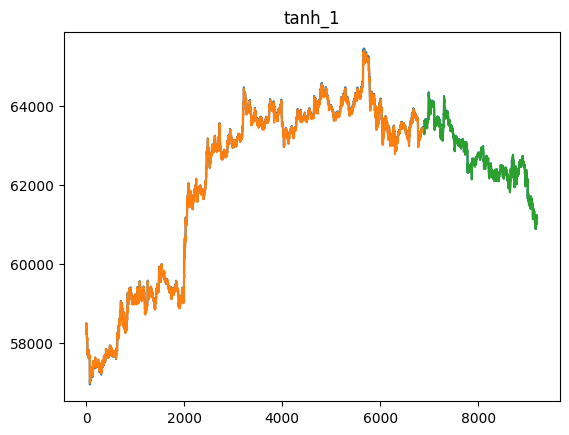

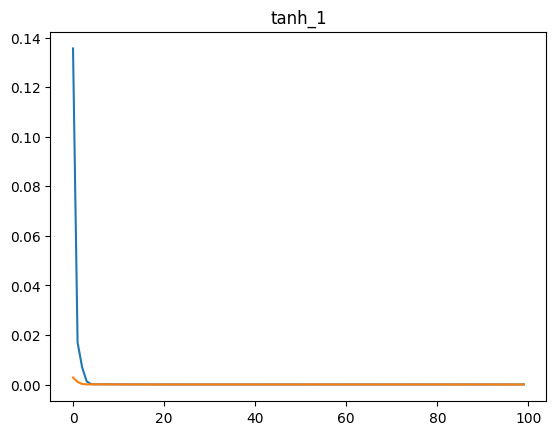

sigmoid lookback = 1
72/72 [==============================] - 0s 3ms/step


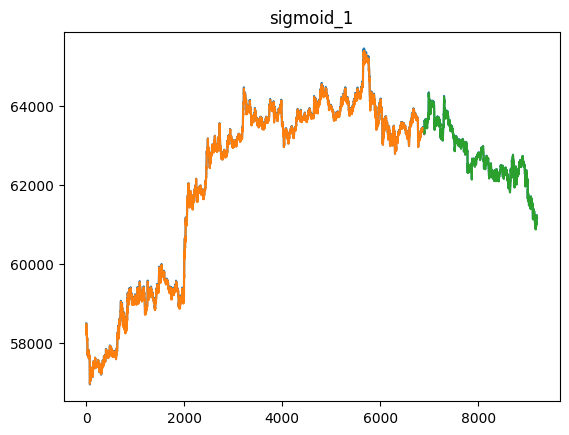

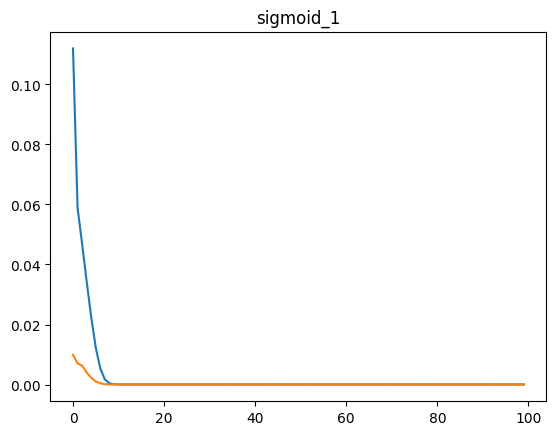

relu lookback = 1
72/72 [==============================] - 0s 3ms/step


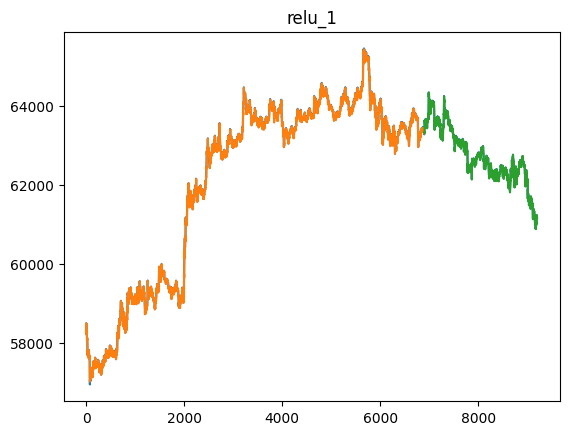

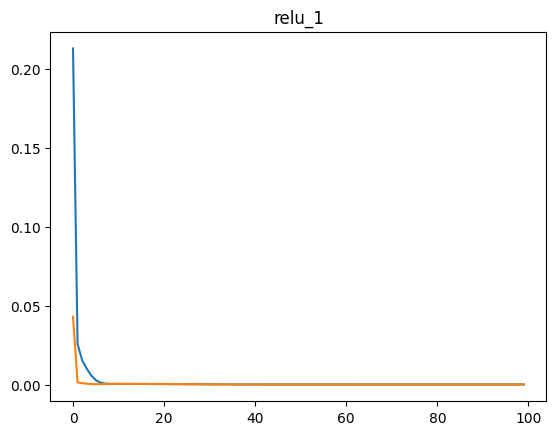

linear lookback = 1
72/72 [==============================] - 0s 2ms/step


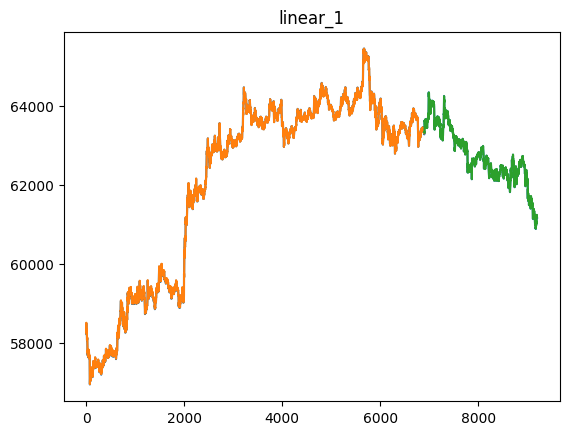

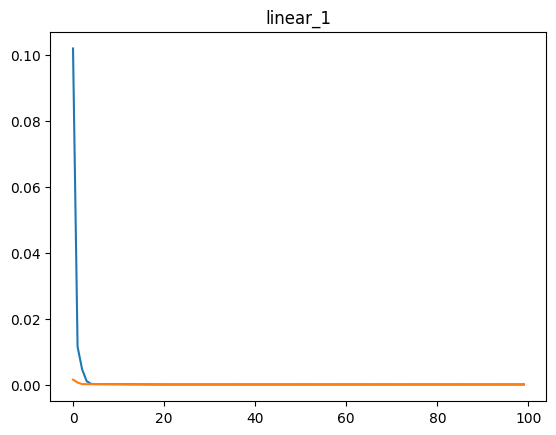

cloglog lookback = 1
72/72 [==============================] - 0s 2ms/step


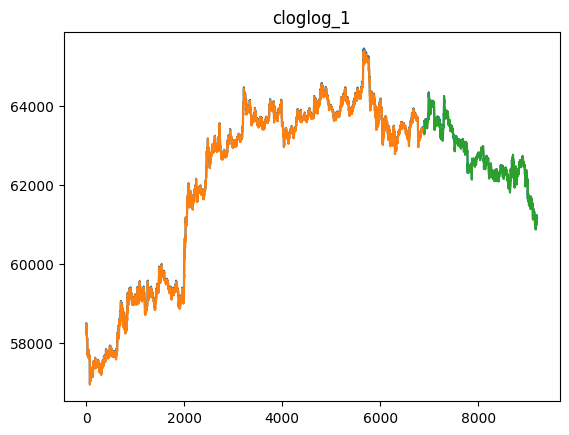

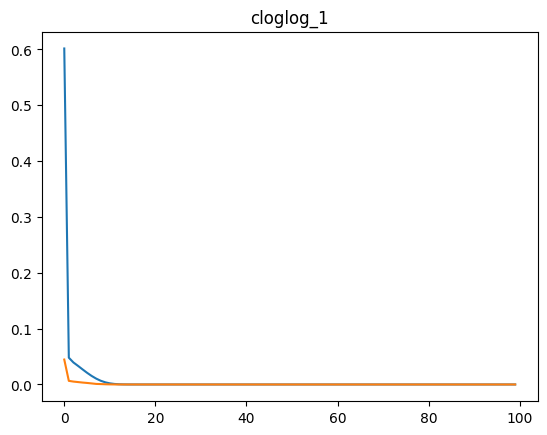

loglog lookback = 1
72/72 [==============================] - 0s 3ms/step


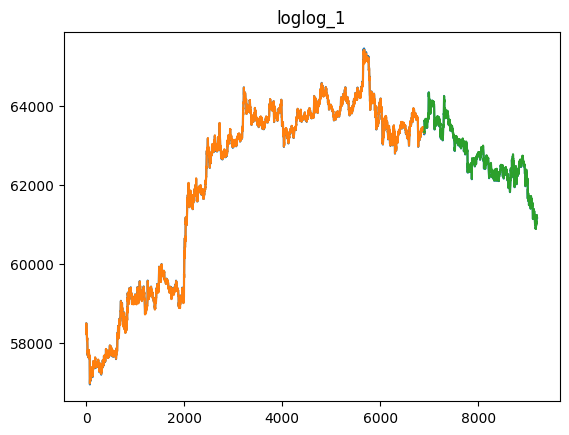

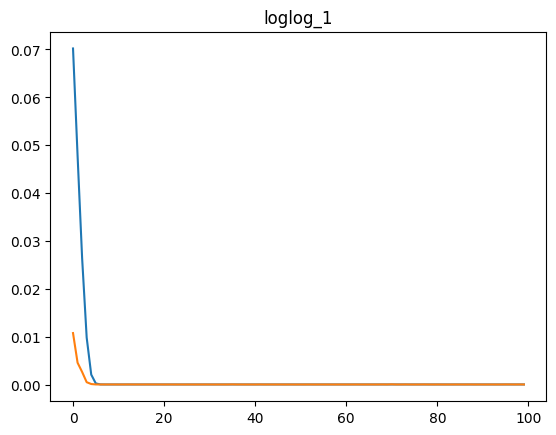

tanh lookback = 2
72/72 [==============================] - 0s 3ms/step


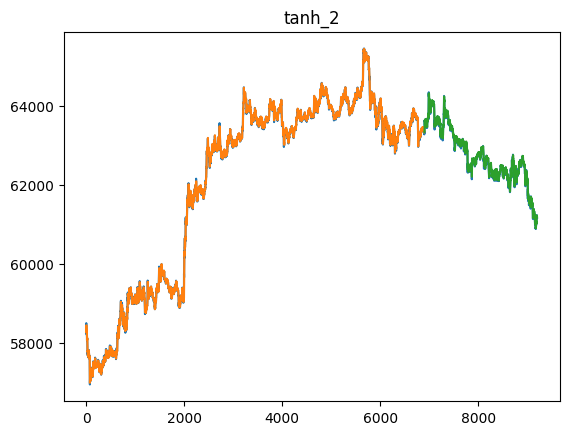

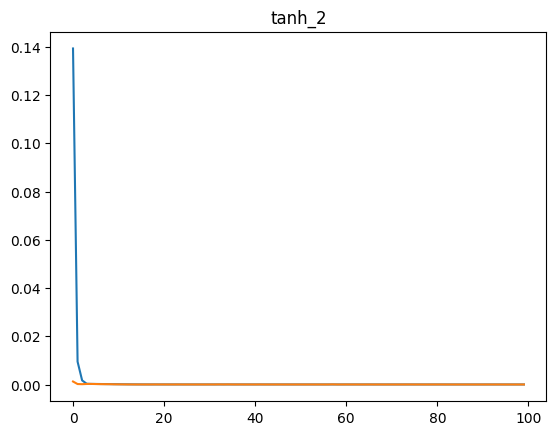

sigmoid lookback = 2
72/72 [==============================] - 0s 2ms/step


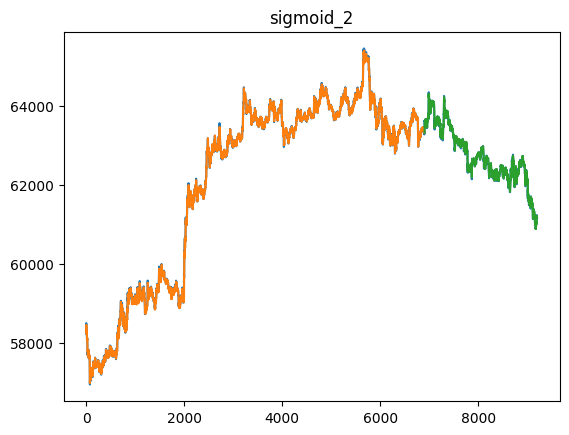

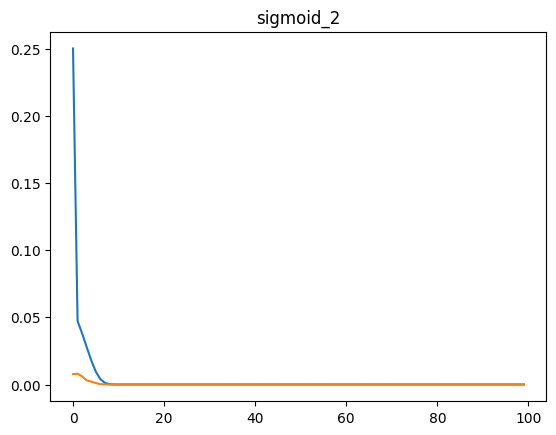

relu lookback = 2
72/72 [==============================] - 0s 3ms/step


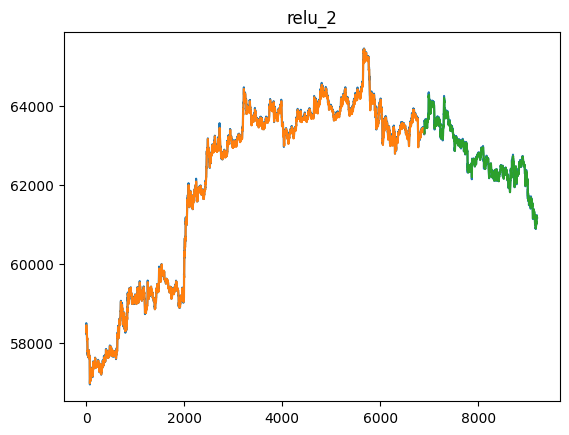

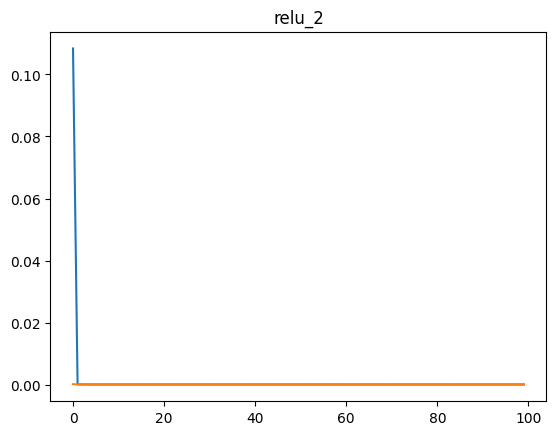

linear lookback = 2
72/72 [==============================] - 0s 2ms/step


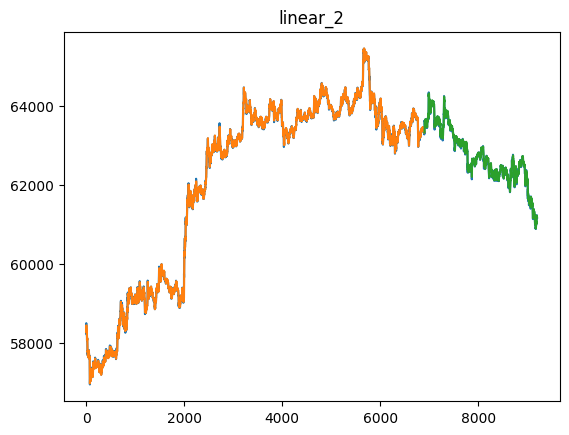

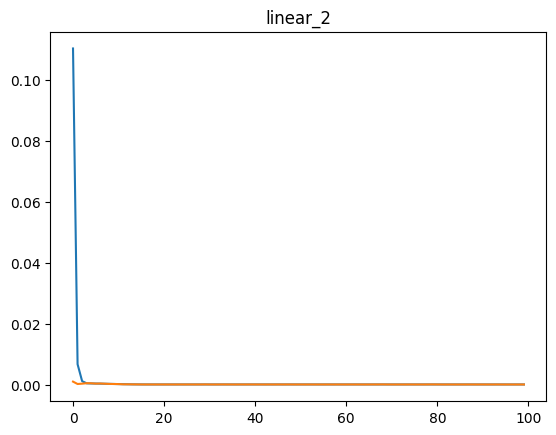

cloglog lookback = 2
72/72 [==============================] - 0s 3ms/step


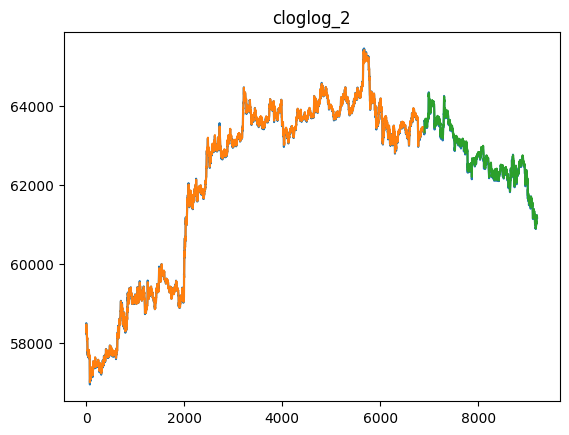

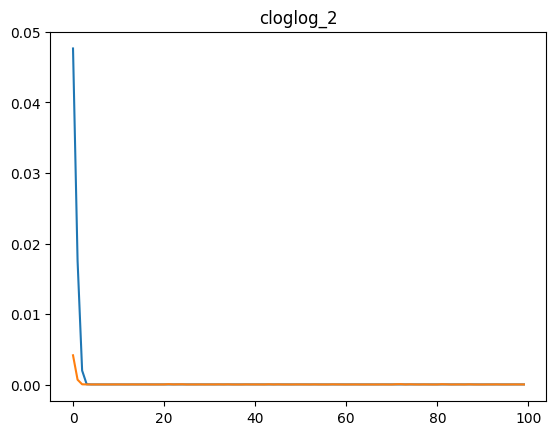

loglog lookback = 2
72/72 [==============================] - 0s 2ms/step


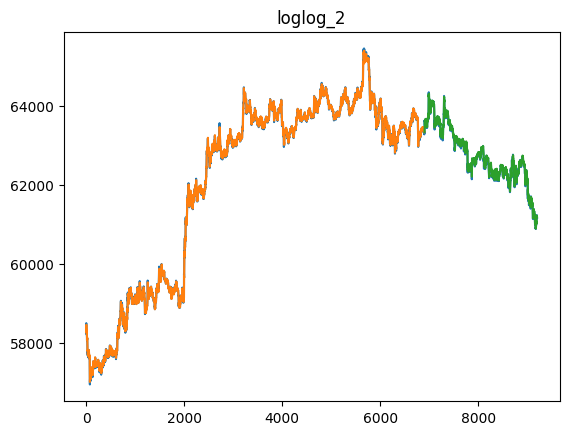

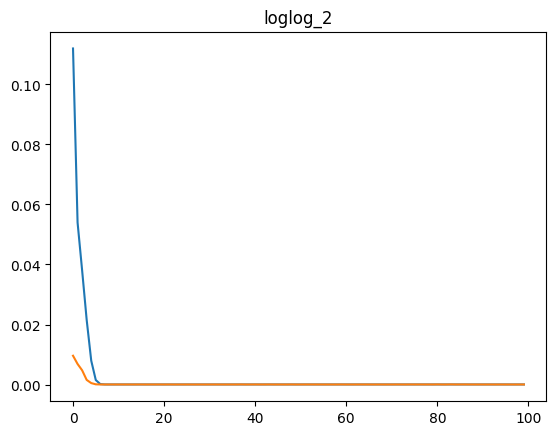

tanh lookback = 5
72/72 [==============================] - 0s 4ms/step


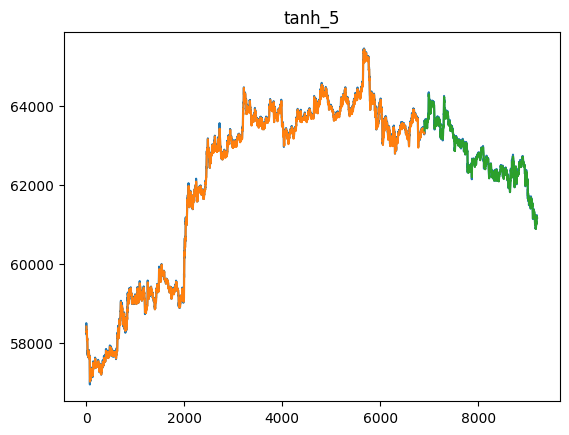

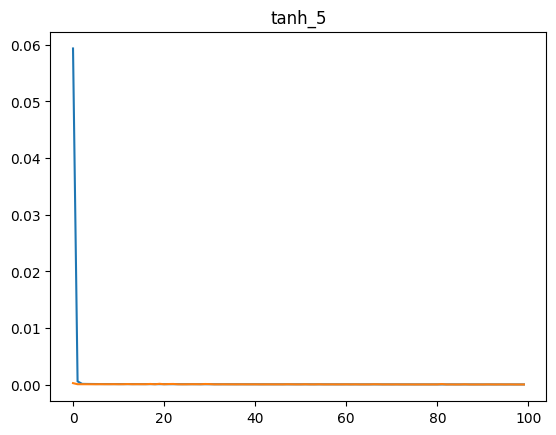

sigmoid lookback = 5
72/72 [==============================] - 0s 3ms/step


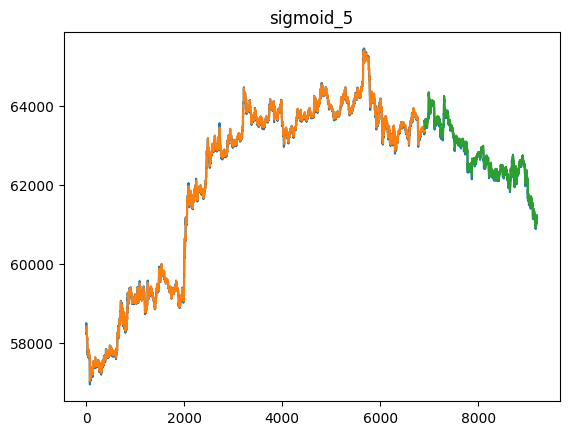

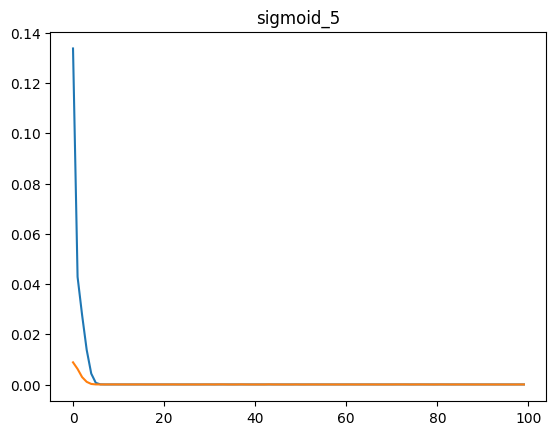

relu lookback = 5
72/72 [==============================] - 0s 2ms/step


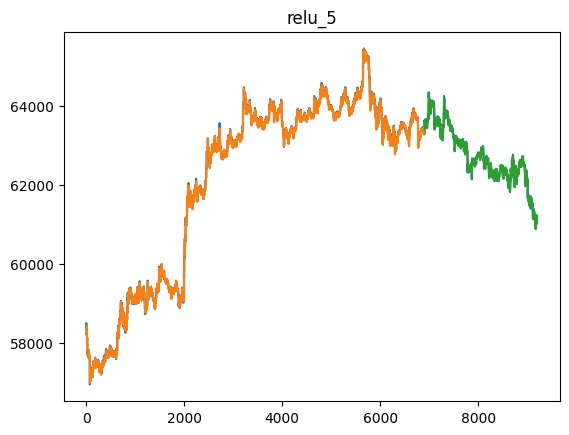

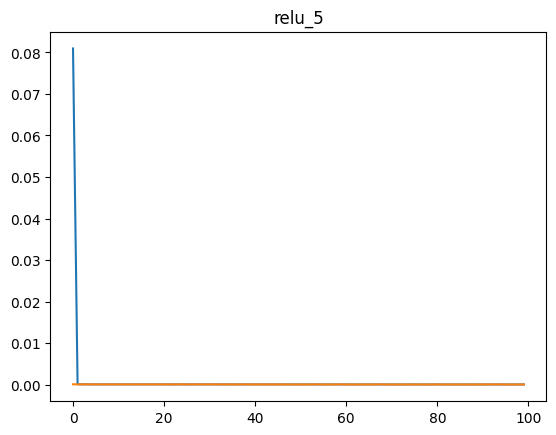

linear lookback = 5
72/72 [==============================] - 0s 2ms/step


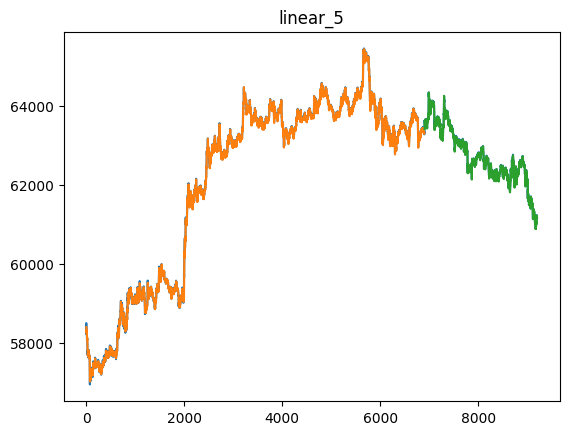

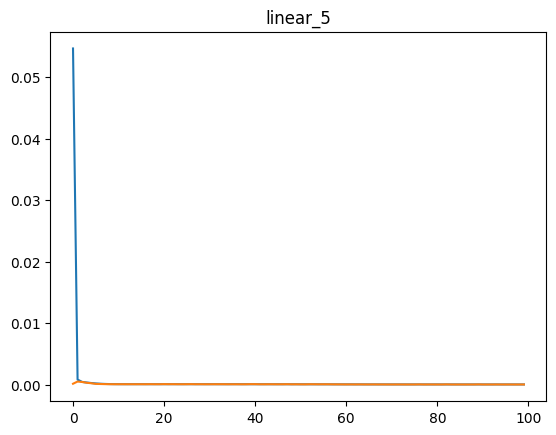

cloglog lookback = 5
72/72 [==============================] - 0s 3ms/step


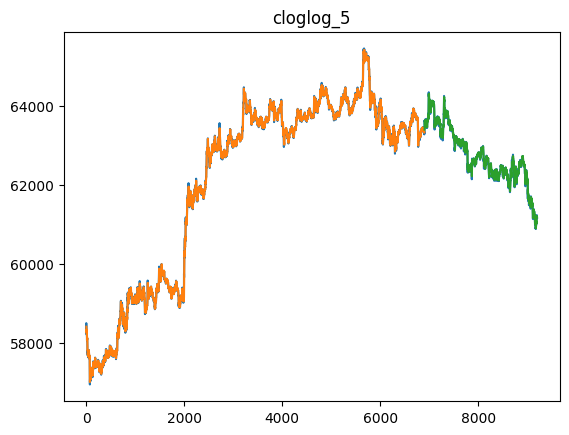

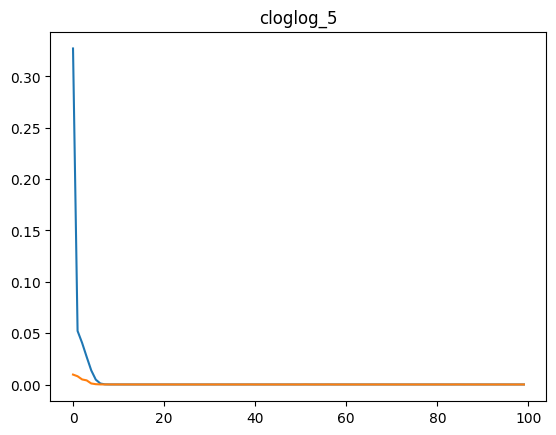

loglog lookback = 5
72/72 [==============================] - 0s 2ms/step


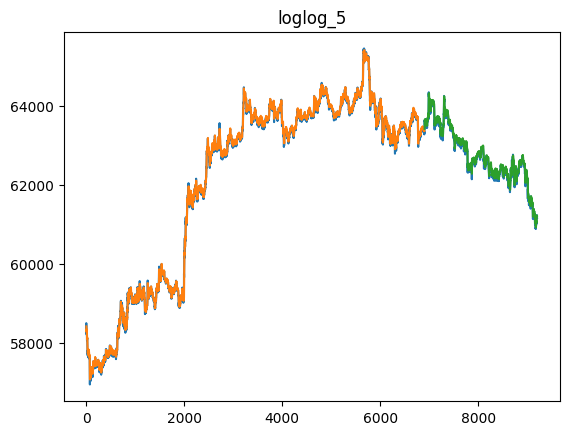

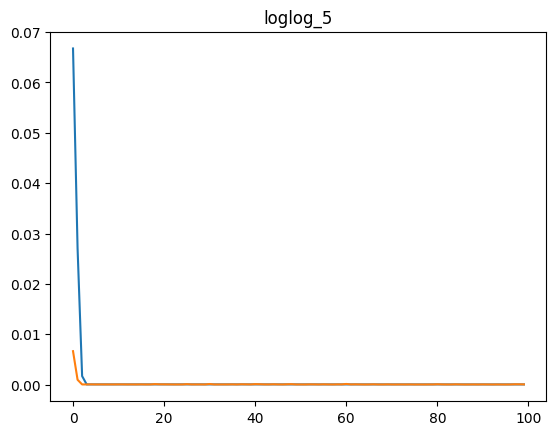

tanh lookback = 10
72/72 [==============================] - 0s 3ms/step


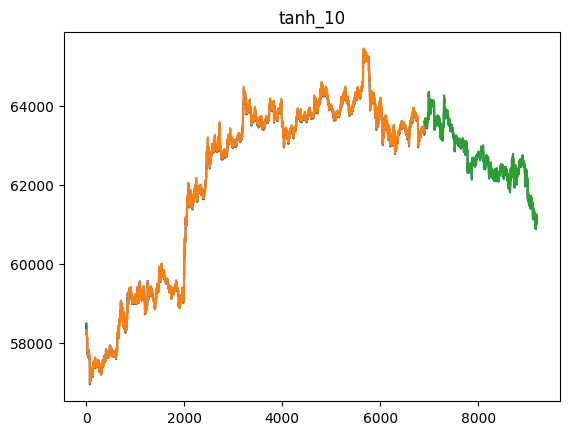

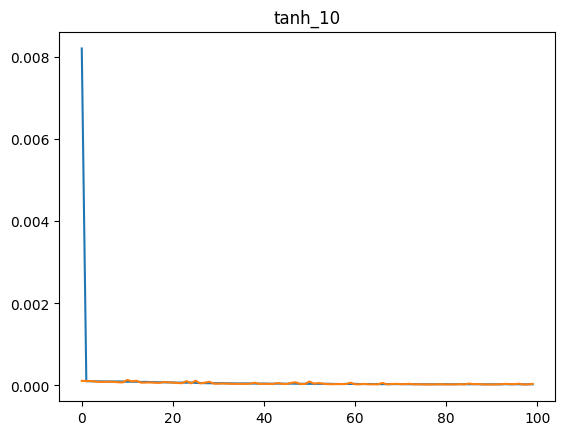

sigmoid lookback = 10
72/72 [==============================] - 0s 3ms/step


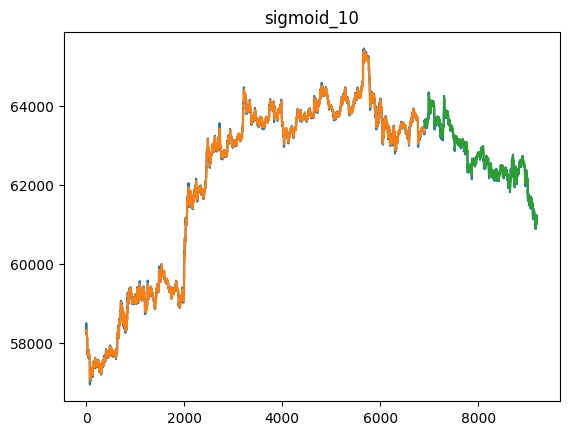

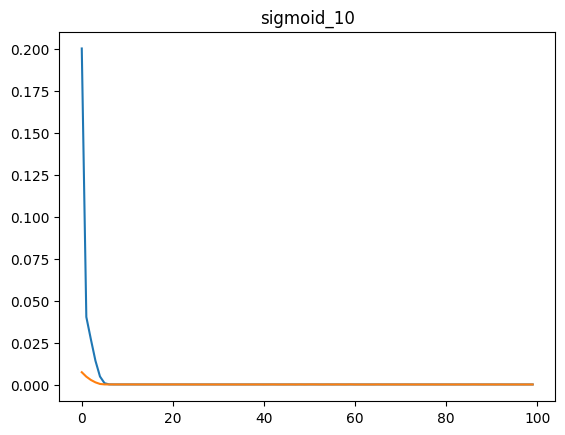

relu lookback = 10
72/72 [==============================] - 0s 3ms/step


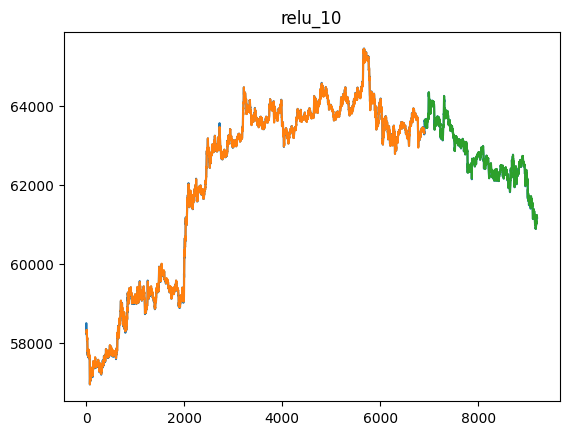

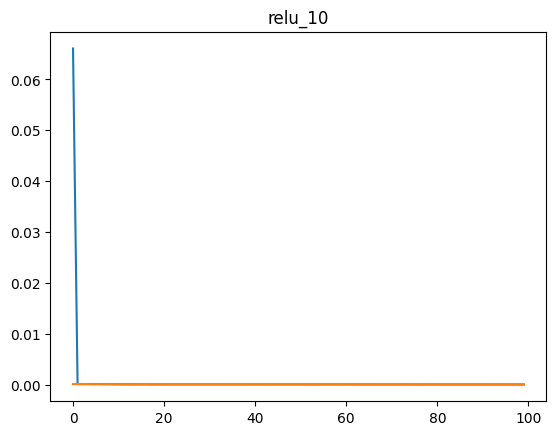

linear lookback = 10
72/72 [==============================] - 0s 4ms/step


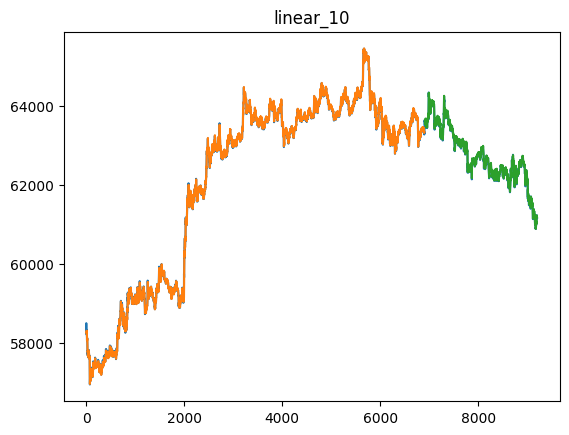

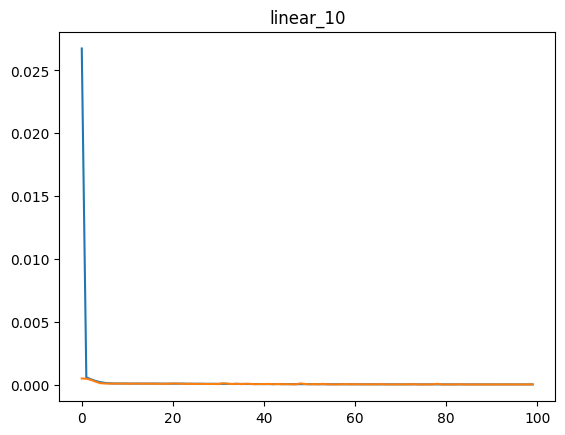

cloglog lookback = 10
72/72 [==============================] - 0s 3ms/step


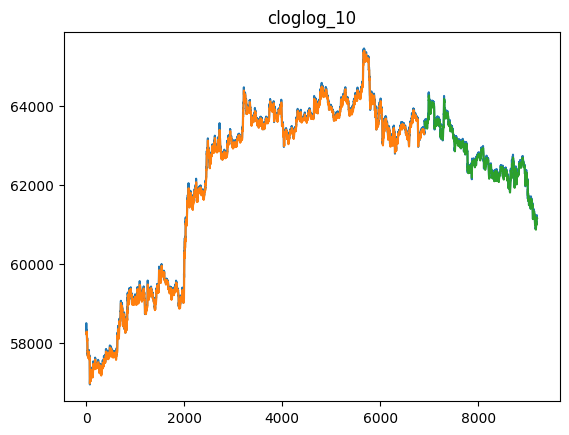

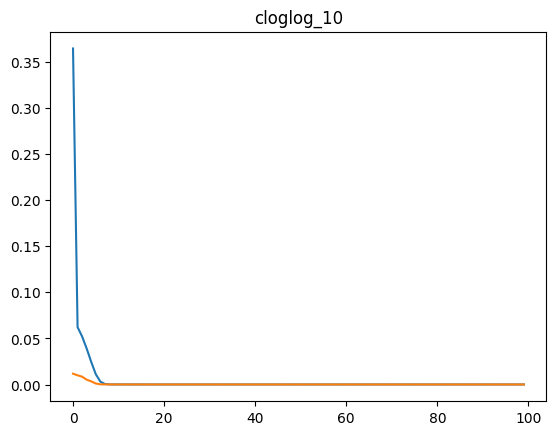

loglog lookback = 10
72/72 [==============================] - 0s 3ms/step


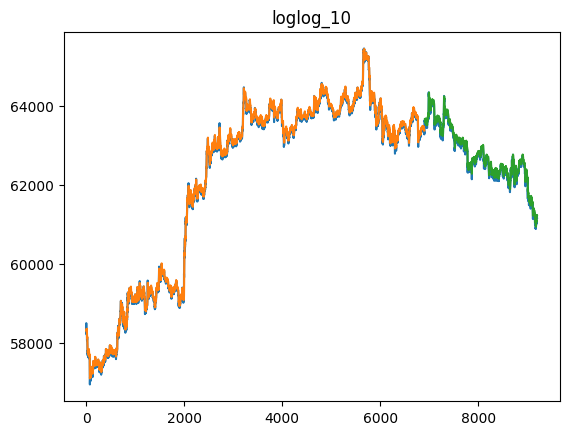

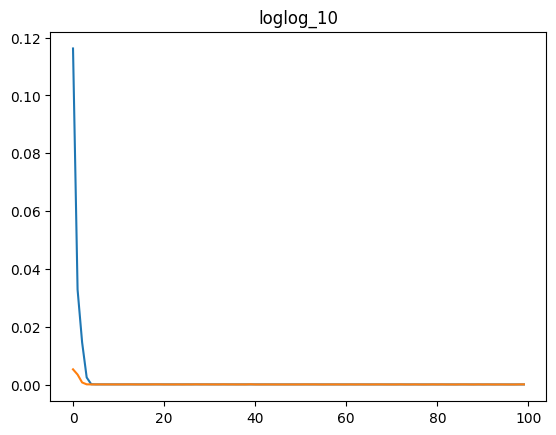

tanh lookback = 30
71/71 [==============================] - 0s 6ms/step


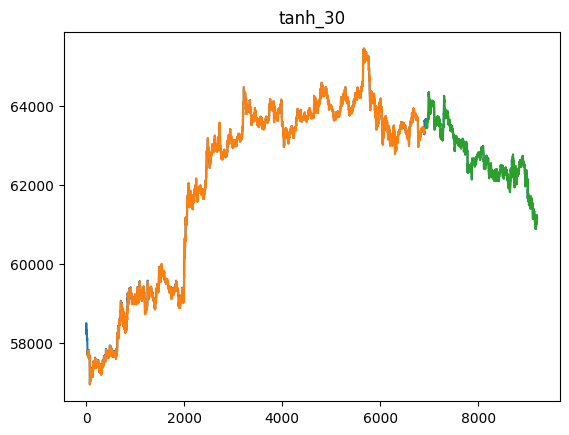

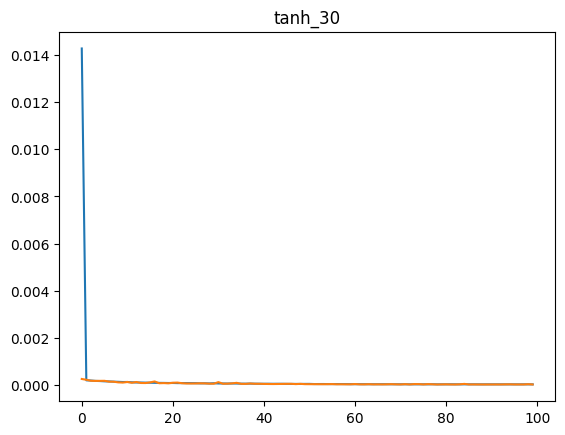

sigmoid lookback = 30
71/71 [==============================] - 0s 5ms/step


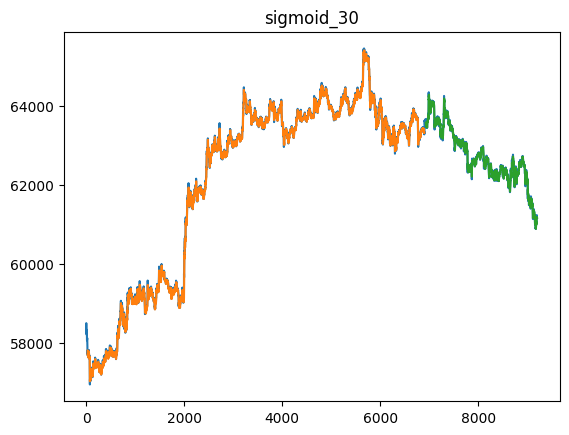

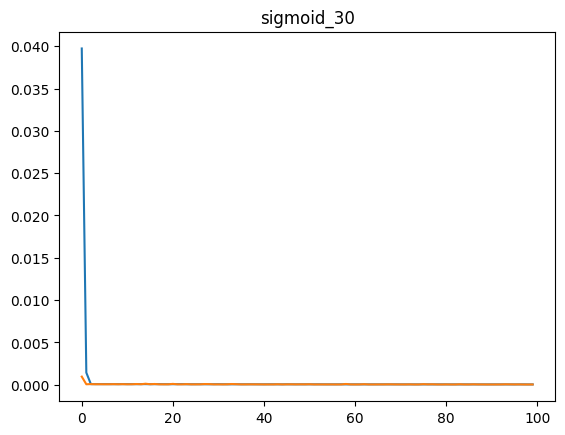

relu lookback = 30
71/71 [==============================] - 0s 6ms/step


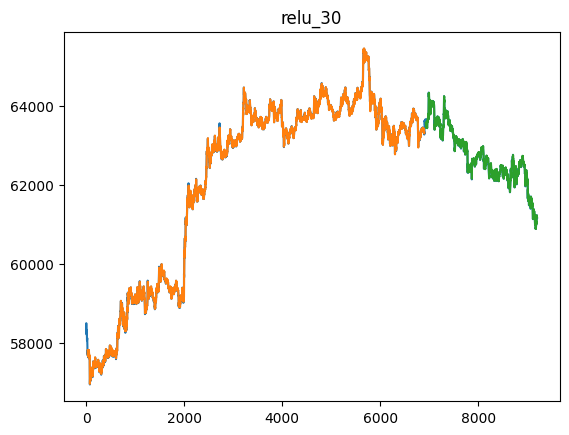

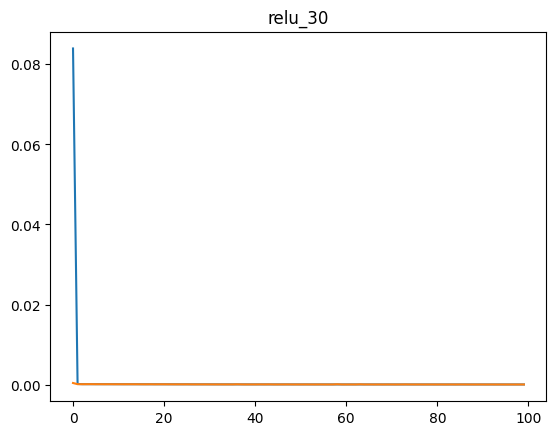

linear lookback = 30
71/71 [==============================] - 0s 5ms/step


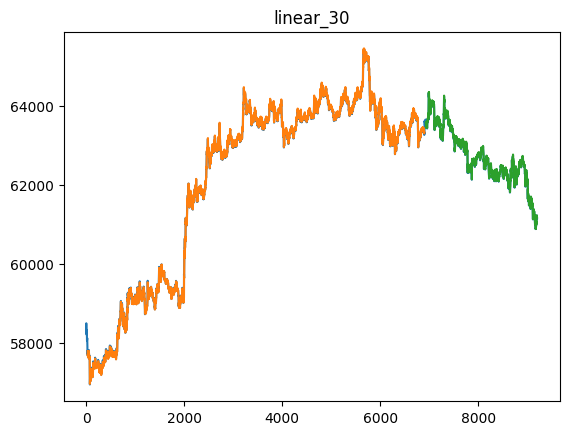

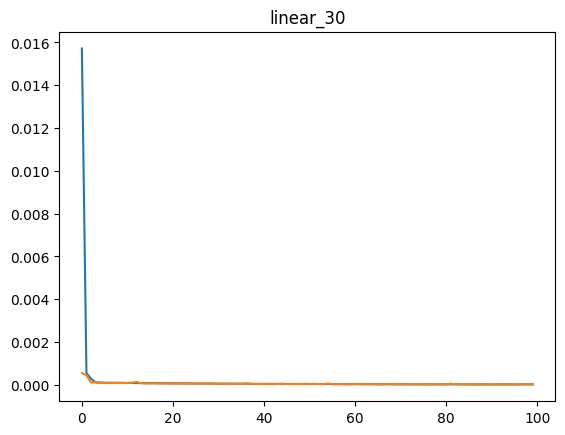

cloglog lookback = 30
71/71 [==============================] - 1s 7ms/step


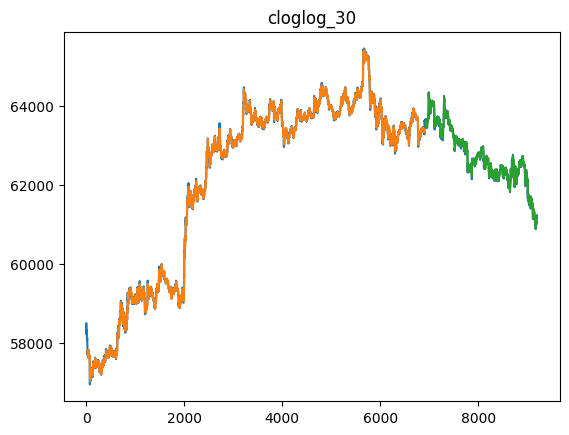

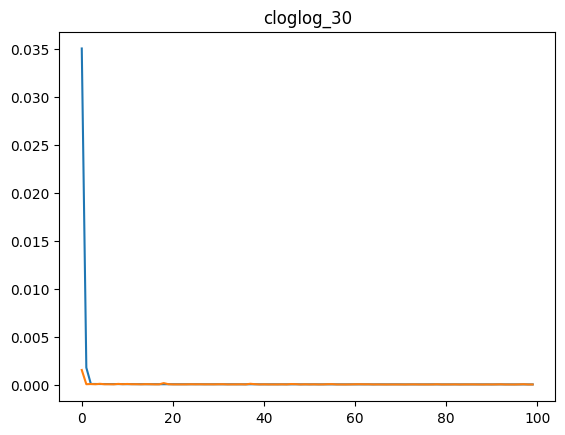

loglog lookback = 30
71/71 [==============================] - 1s 7ms/step


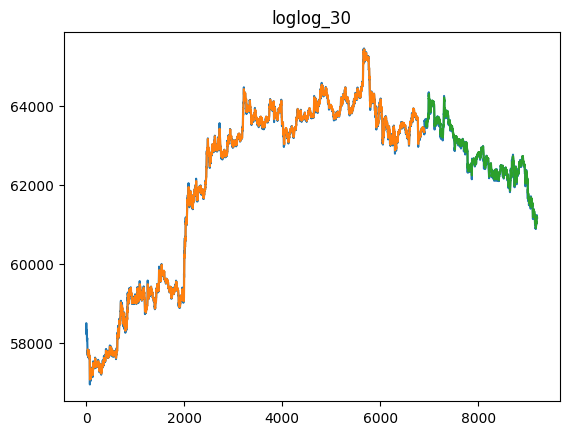

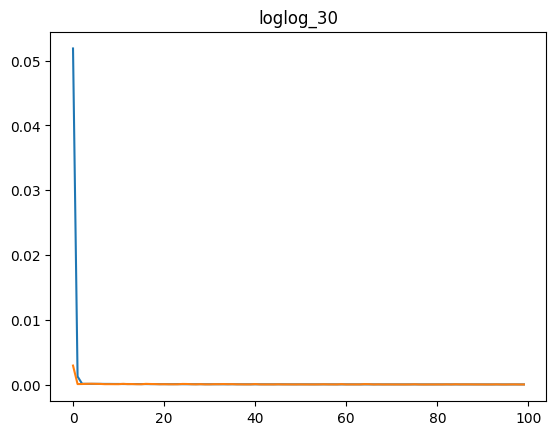

tanh lookback = 60
70/70 [==============================] - 1s 9ms/step


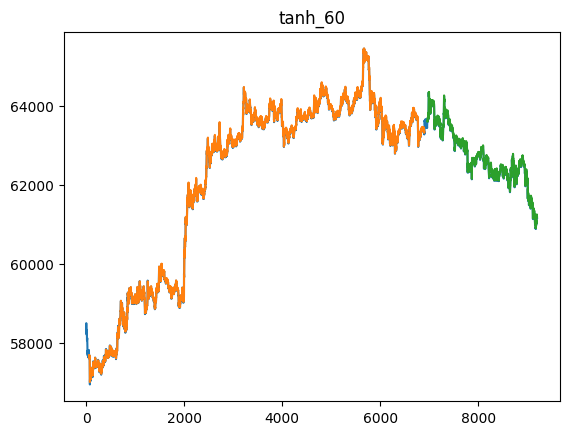

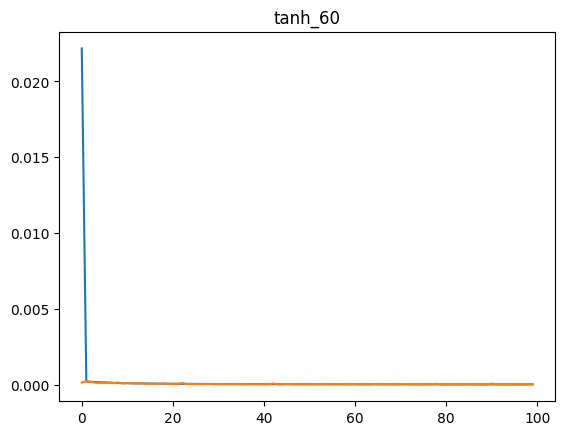

sigmoid lookback = 60
70/70 [==============================] - 1s 9ms/step


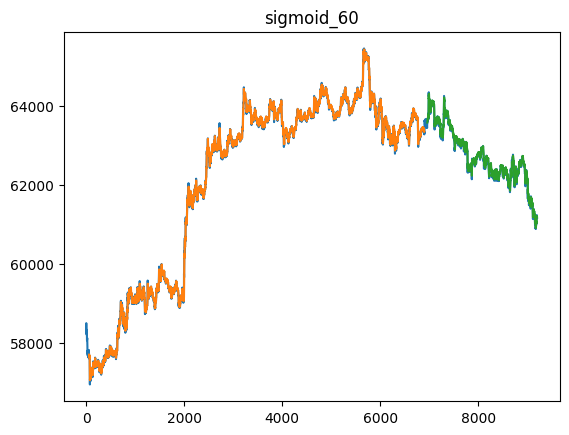

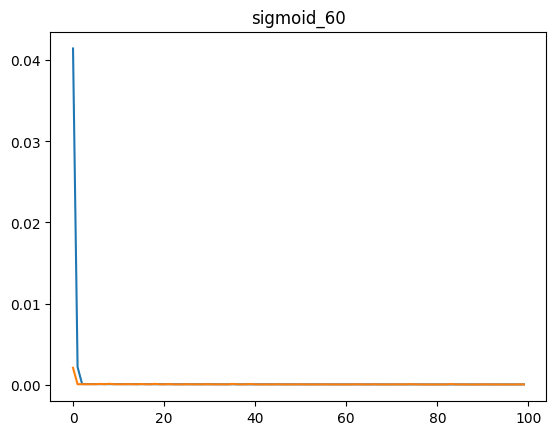

relu lookback = 60
70/70 [==============================] - 1s 8ms/step


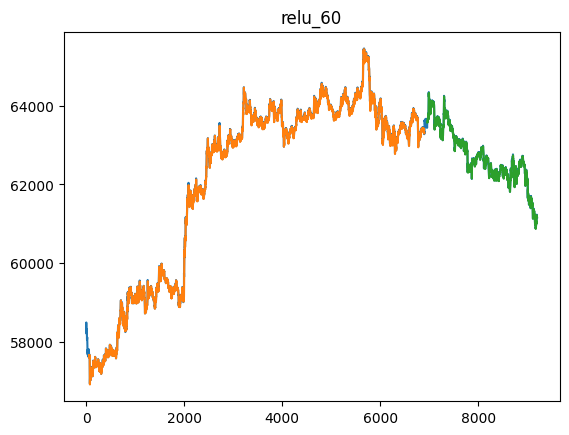

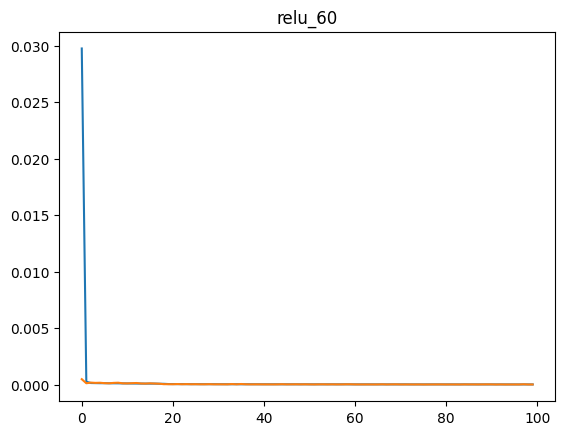

linear lookback = 60
70/70 [==============================] - 1s 9ms/step


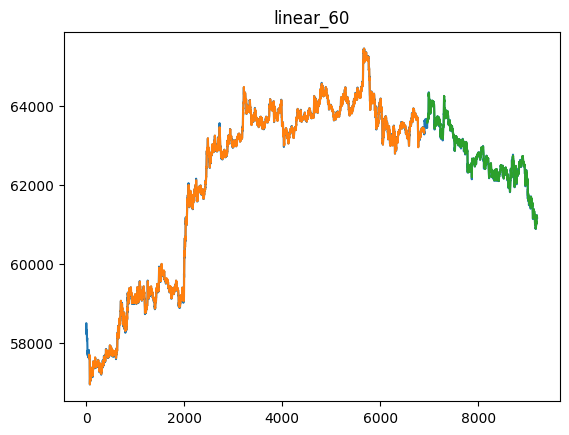

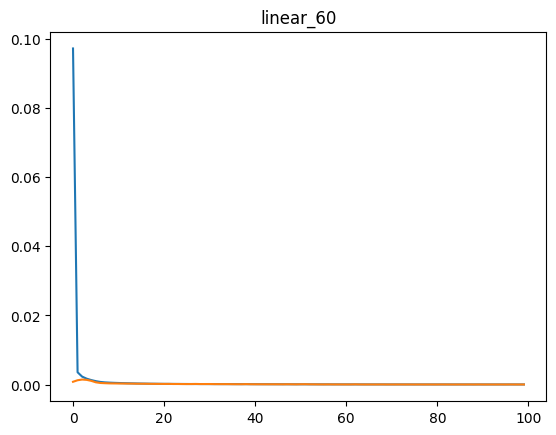

cloglog lookback = 60
70/70 [==============================] - 1s 10ms/step


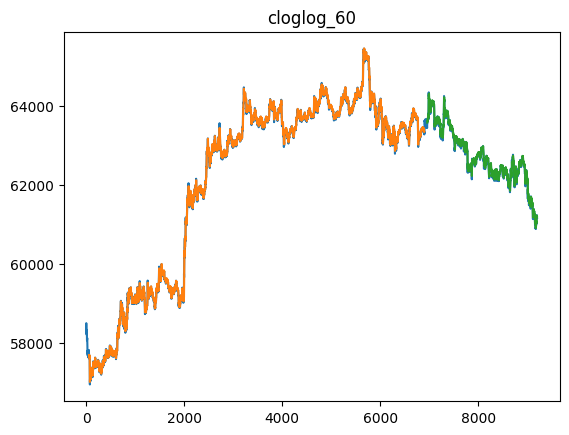

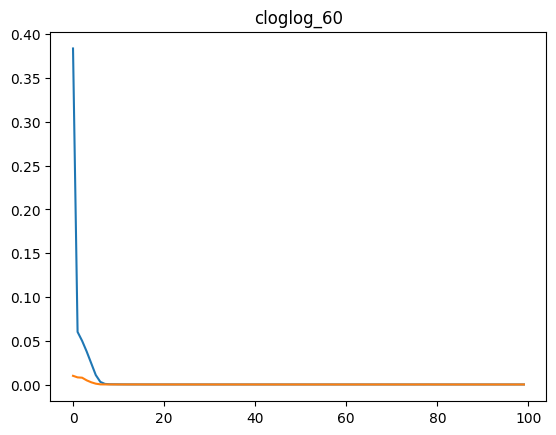

loglog lookback = 60
70/70 [==============================] - 1s 12ms/step


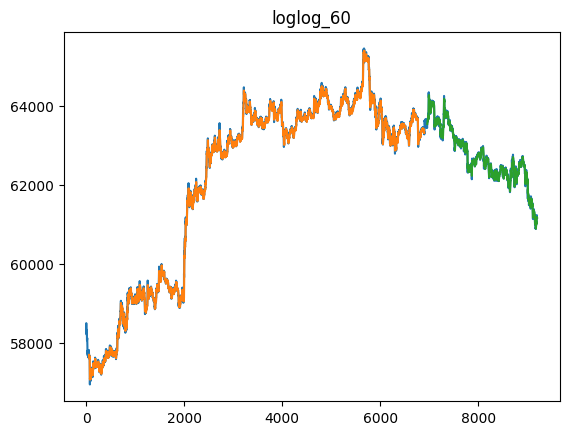

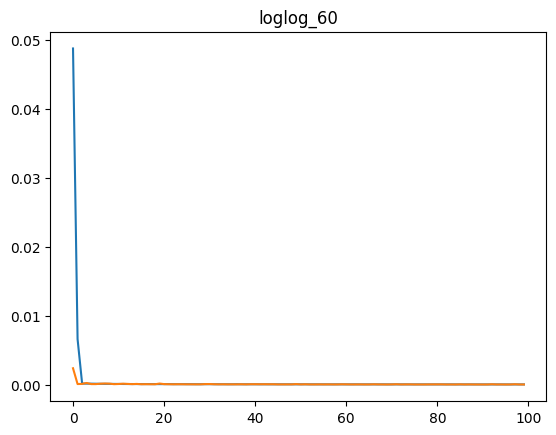

In [ ]:
for step in steps:

  for lookback in lookbacks:

    for activ in activation_functions:
      url='/content/drive/MyDrive/diploma/lookback'+'/'+step+'/'+activ+'/'
      tf.keras.backend.clear_session()
      print(activ+' lookback = '+str(lookback))
      dataset = get_historical_close_data(companies,step)
      #dataset_norm = normalization(dataset['Close'].values.reshape(-1,1))
      scaler=MinMaxScaler(feature_range=(0,1))
      dataset_norm=scaler.fit_transform(np.array(dataset['Close'].values).reshape(-1,1))

      train_dataset, test_dataset = split_train_test(dataset_norm)

      train_X, train_y = create_dataset(train_dataset, lookback)

      test_X, test_y = create_dataset(test_dataset,lookback)

      # reshape input to be [samples, time steps, features] which is required for LSTM
      train_X =train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
      test_X = test_X.reshape(test_X.shape[0],test_X.shape[1] , 1)

      #-------------------------------
      tf.keras.backend.clear_session()

      if (activ!='cloglog' and activ!='loglog'):
        model=Sequential()
        model.add(LSTM(unit,input_shape=(lookback,1),activation=activ))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',optimizer='adam')
        start_time = time.time()
        result=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=100,batch_size=32,verbose=False)
        end_time = time.time()
        train_timing.loc[i, activ]=(end_time-start_time)

      elif (activ=='cloglog' or activ=='loglog') :
        get_custom_objects().update({'custom_activation': Activation(globals()[activ])})
        model=Sequential()
        model.add(LSTM(unit,input_shape=(lookback,1),activation='custom_activation'))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',optimizer='adam')
        start_time = time.time()
        result=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=100,batch_size=32,verbose=False)
        end_time = time.time()
        train_timing.loc[i, activ]=(end_time-start_time)
      #-------------------------------

      train_predict=model.predict(train_X)
      start_time = time.time()
      test_predict=model.predict(test_X)
      end_time = time.time()
      test_timing.loc[i, activ]=(end_time-start_time)
      train_predict.shape, test_predict.shape

      # Transform back to original form
      train_predict = scaler.inverse_transform(train_predict)
      test_predict = scaler.inverse_transform(test_predict)
      original_ytrain = scaler.inverse_transform(train_y.reshape(-1,1))
      original_ytest = scaler.inverse_transform(test_y.reshape(-1,1))


      rmse_train= math.sqrt(mean_squared_error(original_ytrain,train_predict))
      mae_train=mean_absolute_error(original_ytrain,train_predict)
      mape_train=mean_absolute_percentage_error(original_ytrain,train_predict)

      rmse_test=math.sqrt(mean_squared_error(original_ytest,test_predict))
      mae_test=mean_absolute_error(original_ytest,test_predict)
      mape_test=mean_absolute_percentage_error(original_ytest,test_predict)

      df[activ]=[rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]


      trainPredictPlot = np.empty_like(dataset_norm)
      trainPredictPlot[:, ] = np.nan

      trainPredictPlot[lookback:len(train_predict)+lookback, ] = train_predict[:,0].reshape(-1,1)

      testPredictPlot = np.empty_like(dataset_norm)
      testPredictPlot[:,] = np.nan
      testPredictPlot[len(train_predict)+(lookback*2)+1:len(dataset['Close'])-1, ] = test_predict[:,0].reshape(-1,1)

      plt.plot(de_normalization(dataset['Close'].values.reshape(-1,1),dataset_norm))
      plt.plot(trainPredictPlot)
      plt.plot(testPredictPlot)
      plt.title(activ+'_'+str(lookback))
      plt.savefig(url+str(activ)+'_'+companies+'_'+step+'_'+str(lookback)+'.png')
      plt.show()

      plt.plot(result.history['loss'])
      plt.plot(result.history['val_loss'])
      plt.title(activ+'_'+str(lookback))
      plt.savefig(url+str(activ)+'_loss_'+companies+'_'+step+'_'+str(lookback)+'.png')
      plt.show()


      result_loss[activ]=result.history['loss']
      result_val_loss[activ]=result.history['val_loss']

    url='/content/drive/MyDrive/diploma/lookback'+'/'+step+'/'
    df.to_csv(url+'metrics_'+companies+'_'+step+'_'+str(lookback)+'.csv')
    result_loss.to_csv(url+'result_loss'+companies+'_'+step+'_'+str(lookback)+'.csv')
    result_val_loss.to_csv(url+'result_val_loss'+companies+'_'+step+'_'+str(lookback)+'.csv')

    i+=1



  url='/content/drive/MyDrive/diploma/lookback'+'/'+step+'/'


  train_timing.to_csv(url+'train_timing'+companies+'_'+step+'.csv')
  test_timing.to_csv(url+'test_timing'+companies+'_'+step+'.csv')